<font size=6  color= 'white' > <b>[LEPL1507] - PROJET P4</b> <br>
<br><br>
Airson Alexis<br>
Beniffou Ibrahim <br>
Henneaux Lucas <br>
Lemaire Antoine <br>
Smith Marielle <br>
Canon Théo<br>
<div style="text-align: right"> </div>

<br><br>
</font>


This is the version maintaining the essential parts of code to run

Easier to add new features 


<font size=6  color= 'white' > <b> Phase 1 : retrieving data </b> <br>

The aim of this first part is to get arrays of images 

In [1]:
# CELL 1.1 : accessing to data 
# Needs [ CELL 0 : import ]

# defines variables 

#-----------------------------------------------------------------------------

path_training = 'BelgiumTSC_Training\Training'
path_testing = 'BelgiumTSC_Testing\Testing'

nbr_class = 62 # len(next(walk(path_training))[1])  counting the number of classes 
print('number of classes : ', nbr_class)

#-----------------------------------------------------------------------------

# resol is the format for the images that we want for convenience

resol = 50 # Square image only ! 
print("Resolution of images : ", resol)

number of classes :  62
Resolution of images :  50


In [2]:
from retrieving_data import accessing

# These are iterators 
# See fct accessing in codes of Phase 1 
training_set = accessing(path_training, resol)
test_set = accessing(path_testing, resol) 

number of images in the folder :  4575
Found 4575 images belonging to 62 classes.
number of images in the folder :  2520
Found 2520 images belonging to 62 classes.


In [3]:
from retrieving_data import store

# These are arrays
# See fct store in codes of Phase 1 
X_train, y_train = store(training_set)
X_test, y_test = store(test_set)

Shape of X_train :  (4575, 50, 50, 3)
Shape of y_train :  (4575,)
Shape of X_train :  (2520, 50, 50, 3)
Shape of y_train :  (2520,)


In [4]:
from numpy import concatenate 
from sklearn.model_selection import train_test_split

# We combine the 2 sets because we will split in train and test sets by ourselves with shuffling 

X = concatenate((X_train, X_test))
y= concatenate((y_train, y_test))

print("Shape of X : ", X.shape)
print("Shape of y : ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

print("Shape of final X_train : ", X_train.shape)
print("Shape of final y_train : ", y_train.shape)

print("Shape of final X_test : ", X_test.shape)
print("Shape of final y_test : ", y_test.shape)

Shape of X :  (7095, 50, 50, 3)
Shape of y :  (7095,)
Shape of final X_train :  (5321, 50, 50, 3)
Shape of final y_train :  (5321,)
Shape of final X_test :  (1774, 50, 50, 3)
Shape of final y_test :  (1774,)


<font size=6  color= 'white' > <b> Phase 2 : visualisation of the dataset </b> <br>

The aim of this part is to visualise the initial datasets 

In [5]:
from Visu import number
from copy import deepcopy

initial_nbr_train = number(nbr_class, deepcopy(y_train))
initial_nbr_test = number(nbr_class, deepcopy(y_test))

Number of each sign in the set : 

[ 19 102  12  17  25  12  21 179  29  13  35   4  16  94  43   6  15 183
 152 293  30  62 331  21  53  32   6  22 130  44  57 110 561  12  38 160
  15 102 374 212 221 120  36  29  43 124  31 132  10  10   9  25  20 170
 125  16  93  94  18  38  17 298]

Total of signs :  5321

Number of each sign in the set : 

[  2  35   8   4   2   2   3  68  10   5  14   3   5  35  15   3   6  79
  51 101  15  26 105   9   8  13   0   5  46  17  17  39 177   0  17  54
   3  27 124  83  69  39   8   7   8  34  19  46   1   5   6   5   7  53
  41  11  35  25   6  21   3  89]

Total of signs :  1774



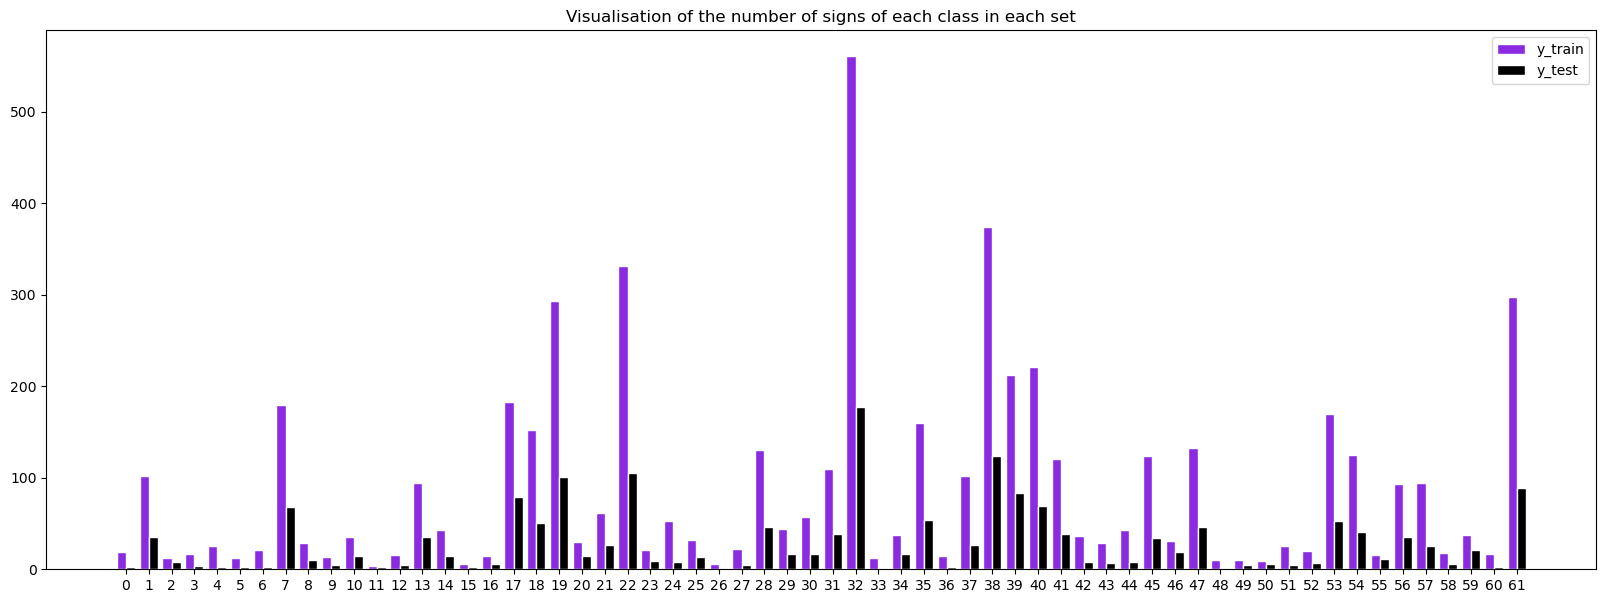

In [6]:
from Visu import graphs
from copy import deepcopy

graphs(nbr_class, deepcopy(y_train), deepcopy(y_test), 'y_train', 'y_test')

<font size=6  color= 'white' > <b> Phase 3 : augmentation of the dataset </b> <br>

The aim of this part is to change the sizes of the initial datasets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


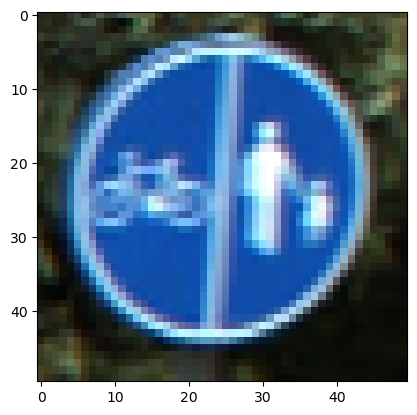

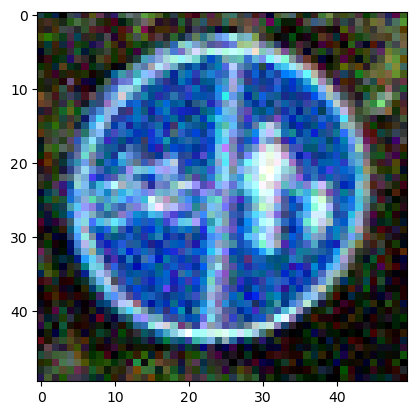

In [7]:
from Deteriorate import noise 

from matplotlib.pyplot import figure, imshow
from random import randint
from copy import deepcopy 
from numpy import zeros

# Here are the parameters for the normal noise we'll apply on image 
mean = 0
var = 0.01

Noise = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Noise[i] = noise(deepcopy(X_train[i]), mean, var)

# A little visualisation of the noise 

idx = randint(0,len(X_train))
figure()
imshow(X_train[idx])
figure()
imshow(Noise[idx])

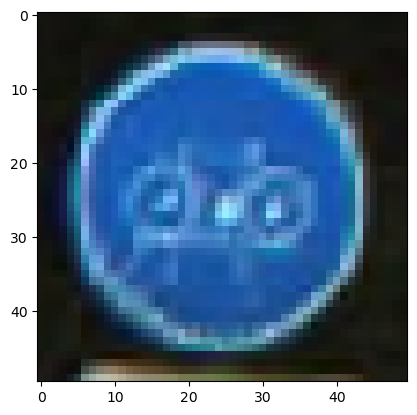

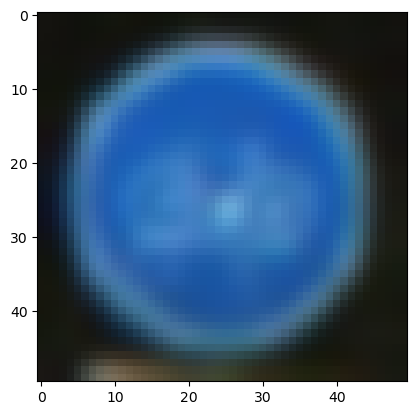

In [35]:
from Deteriorate import blur 

from numpy import zeros 

# Here are the parameters for variation of intensity on pixels 
sigma = 1.5 

Blur = zeros(X_train.shape)

for i in range (len(X_train)) : 
    Blur[i] = blur(deepcopy(X_train[i]), resol, sigma)

# A little visualisation of the blur 

idx = randint(0,len(X_train))
figure()
imshow(X_train[idx])
figure()
imshow(Blur[idx])

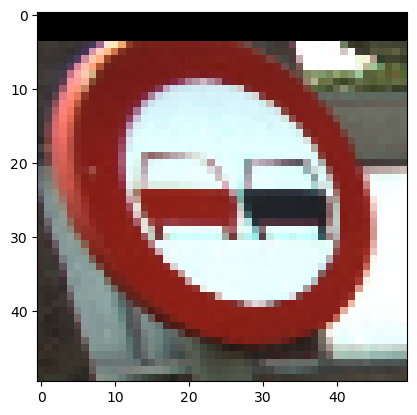

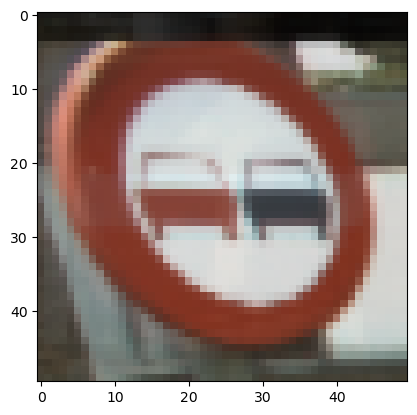

In [9]:
from scipy.ndimage import gaussian_filter 

# Applying gaussian filter 

filter = gaussian_filter(deepcopy(X_train), 0.5)

# A little visualisation of the filter 

idx = randint(0,len(X_train))
figure()
imshow(X_train[idx])
figure()
imshow(filter[idx])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


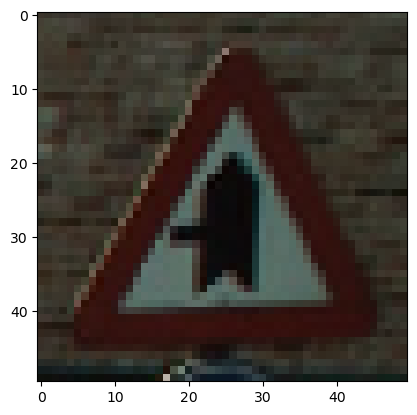

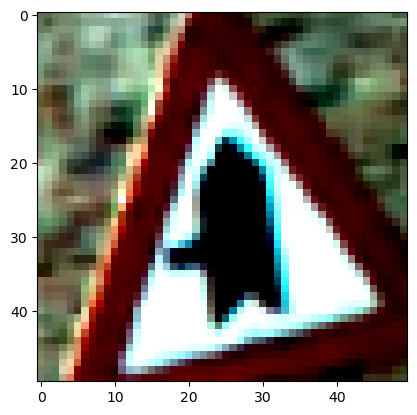

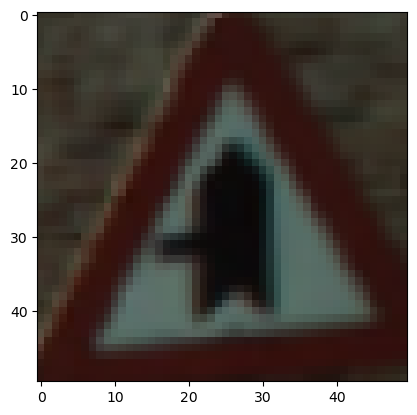

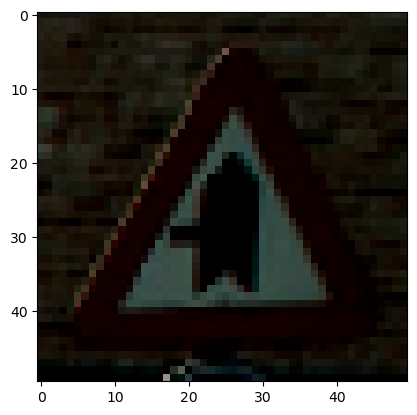

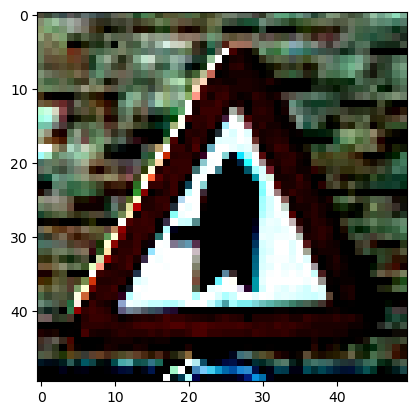

In [10]:
from keras import Sequential
from keras.layers import RandomZoom, RandomRotation, RandomCrop, RandomContrast, RandomBrightness
from tensorflow import get_logger
from copy import deepcopy
from numpy import array, zeros
from scipy.ndimage import gaussian_filter
from numpy.random import normal
from cv2 import GaussianBlur
from matplotlib.pyplot import figure, imshow

# This cell is about data augmentation 
# We will apply this on images when will do our augmentation (cells later) 

#-----------------------------------------------------------------------------

get_logger().setLevel('ERROR')

data_augmentation = Sequential() 

data_augmentation.add(RandomRotation((-0.05, 0.05)))
data_augmentation.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
data_augmentation.add(RandomCrop(height=resol,width=resol))
data_augmentation.add(RandomBrightness(0.6, value_range=(0.0, 1.0)))
data_augmentation.add(RandomContrast((0.0,5.0)))

#-----------------------------------------------------------------------------

augmentation_noise_blur = Sequential()

augmentation_noise_blur.add(RandomRotation((-0.05, 0.05)))
augmentation_noise_blur.add(RandomZoom(height_factor=(-0.3, -0.2),width_factor=(-0.3, -0.2)))
augmentation_noise_blur.add(RandomCrop(height=resol,width=resol))

#-----------------------------------------------------------------------------

brightness = Sequential()

brightness.add(RandomBrightness(0.6, value_range=(0.0, 1.0)))

#-----------------------------------------------------------------------------

contrast = Sequential()

contrast.add(RandomContrast((0.0,5.0)))

#-----------------------------------------------------------------------------

# A little visualisation of each model 

idx = randint(0,len(X_train))

figure() 
imshow(X_train[idx])

figure() 
imshow(data_augmentation(X_train[idx]))

figure() 
imshow(augmentation_noise_blur(X_train[idx]))

figure() 
imshow(brightness(X_train[idx]))

figure() 
imshow(contrast(X_train[idx]))

In [11]:
from numpy import zeros, where, abs
from tensorflow import gather
from random import randint

def augmentation (nbr_class,initial_nbr_train, X_train, y_train, resol, data_augmentation, noise, blur) : 

    aug = zeros(nbr_class, dtype=int)
    lim = max(initial_nbr_train)-200 # This is our threshold 
    counter = 0

    for i in range(nbr_class) :

        if initial_nbr_train[i] >= lim : continue # If there's enough images 

        # If there's not enough images, we add some  
        aug[i] = int(3/4*(lim - initial_nbr_train[i]))
        counter += aug[i]

    X_train_new = zeros((len(X_train) + counter, resol, resol, 3))
    y_train_new = zeros(len(y_train) + counter)
    X_train_new[:len(X_train)] = X_train
    y_train_new[:len(y_train)] = y_train

    index = len(X_train)

    for i in range(nbr_class) :

        indices = where(y_train == i)
        #augmented_image = tf.gather(augmented_image_train, indices=indices[0])
        
        # For some images, we apply the data_augmentation model 
        for j in range(int(aug[i]/4)) :
            idx = randint(0, len(indices[0])-1)
            augmented_image = data_augmentation(X_train[indices[0][idx]])
            X_train_new[index] = augmented_image
            y_train_new[index] = i
            index += 1

        # For some images, we apply noise and the augmentation_noise_blur model 
        for j in range(int(aug[i]/4)) :
            augmented_image = noise(X_train[indices[0][idx]], mean, var)
            X_train_new[index] = augmentation_noise_blur(augmented_image)
            y_train_new[index] = i
            index += 1

        # For some images, we apply blur and the augmentation_noise_blur model 
        for j in range(int(aug[i]/4)) :
            idx = randint(0, len(indices[0])-1)
            augmented_image = blur(X_train[indices[0][idx]],resol,sigma)
            X_train_new[index] = augmentation_noise_blur(augmented_image)
            y_train_new[index] = i
            index += 1

        # For some images, we apply gaussian filter and the augmentation_noise_blur model
        for j in range(aug[i] - int(3*aug[i]/4)) :
            idx = randint(0, len(indices[0])-1)
            augmented_image = gaussian_filter(X_train[indices[0][idx]], 0.5)
            X_train_new[index] = augmentation_noise_blur(augmented_image)
            y_train_new[index] = i
            index += 1
            

    print("Shape of the augmented training set : ", X_train_new.shape)
    print("Shape of the augmented training target : ", y_train_new.shape)

    return X_train_new, y_train_new

In [12]:
from copy import deepcopy

X_train_new, y_train_new = augmentation(nbr_class,initial_nbr_train, X_train, y_train, resol, data_augmentation, noise, blur)

Shape of the augmented training set :  (18255, 50, 50, 3)
Shape of the augmented training target :  (18255,)


Number of each sign in the set : 

[323 295 273 274 277 273 274 315 278 274 279 269 273 294 280 271 272 316
 308 342 278 286 352 274 282 277 271 275 303 281 285 298 561 273 279 309
 272 295 374 321 326 300 277 278 280 301 276 301 271 271 273 277 273 311
 302 273 294 294 275 279 274 343]

Total of signs :  18255



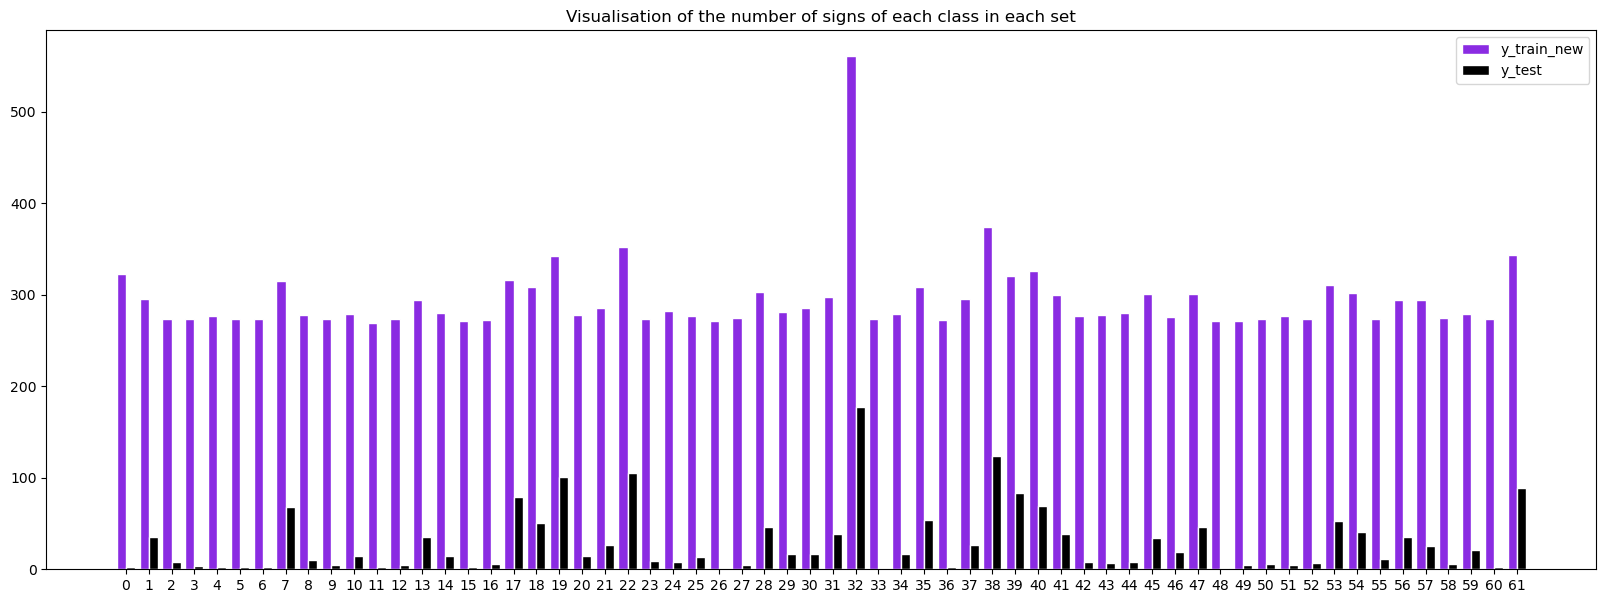

In [13]:
from Visu import graphs, number

nbr_train_new = number(nbr_class, y_train_new)
graphs(nbr_class, y_train_new.copy(), y_test.copy(), 'y_train_new', 'y_test')

In [14]:
from numpy import empty, array
from random import randint 

# Erasing part of the picture to avoid overfitting 

X_train_new_erase = empty(X_train_new.shape)

for i in range(X_train_new.shape[0]):
    
    aug_img = X_train_new[i]
    new_img = array(aug_img)
    yes_or_no = randint(0, 9)                  # this will decide if we erase or not

    if yes_or_no < 5:                                 # 50% chance of erasing
        random_size = randint(0, 3)            # this will decide the size of the patch
        if random_size == 0:
            x_place = randint(0, resol-7)      # we want to erase a 7x15 rectangle
            y_place = randint(0, resol-15)
            for k in range(x_place, x_place+7):
                for j in range(y_place, y_place+15):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
                    
        elif random_size == 1:
            x_place = randint(0, resol-5)      # we want to erase a 5x10 rectangle
            y_place = randint(0, resol-10)
            for k in range(x_place, x_place+5):
                for j in range(y_place, y_place+10):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

        elif random_size == 2:
            x_place = randint(0, resol-15)     # we want to erase a 15x7 rectangle
            y_place = randint(0, resol-7)
            for k in range(x_place, x_place+15):
                for j in range(y_place, y_place+7):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0
        else:
            x_place = randint(0, resol-10)     # we want to erase a 10x5 rectangle
            y_place = randint(0, resol-5)
            for k in range(x_place, x_place+10):
                for j in range(y_place, y_place+5):
                    if (12 <= k <= 18 and 12 <= j <= 18):
                        continue
                    new_img[k, j, 0] = 0
                    new_img[k, j, 1] = 0
                    new_img[k, j, 2] = 0

    X_train_new_erase[i] = new_img

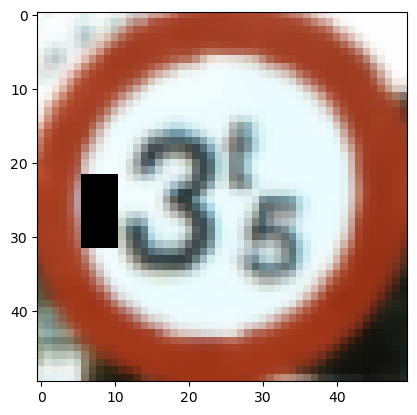

In [36]:
from matplotlib.pyplot import figure, imshow 
from random import randint 

idx = randint(0,len(X_train_new_erase))
figure()
imshow(X_train_new_erase[idx])

In [16]:
from keras.utils import to_categorical
from copy import deepcopy

# We put our results to categorical 

#-----------------------------------------------------------------------------

y_test_tc = to_categorical(deepcopy(y_test), nbr_class)
y_train_tc = to_categorical(deepcopy(y_train), nbr_class)

print("Shape of y_train without augmentation : ", y_train_tc.shape)
print("Shape of y_test without augmentation : ", y_test_tc.shape)

#-----------------------------------------------------------------------------

y_train_new_tc = to_categorical(y_train_new, nbr_class)


print("Shape of y_train with augmentation : ", y_train_new_tc.shape)
print("Shape of y_test with augmentation : ", y_test_tc.shape)

#-----------------------------------------------------------------------------



Shape of y_train without augmentation :  (5321, 62)
Shape of y_test without augmentation :  (1774, 62)
Shape of y_train with augmentation :  (18255, 62)
Shape of y_test with augmentation :  (1774, 62)


<font size=6  color= 'white' > <b> Phase 4 : Construction of the model </b> <br>

The aim of this part is to construct a model using CNN

You can find an optimizer for hyperparameters with the codes of this part

In [17]:
from Model.model import construct_model
from copy import deepcopy

model_simple = construct_model(nbr_class, deepcopy(X_train))

model = construct_model(nbr_class, deepcopy(X_train_new_erase))

model.summary() # Same model so same parameters 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from copy import deepcopy
from keras.callbacks import Callback

#-----------------------------------------------------------------------------

# This will stop training if we reach 98% accuracy 

class haltCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.95):
            print("\n\n\nReached 0.95 val accuracy so cancelling training!\n\n\n")
            self.model.stop_training = True

# We train here the model 

eps = 5 # The number of time we want the model to train on the entire training_set

#-----------------------------------------------------------------------------

trainingStopCallback = haltCallback()
mycallbacks = [EarlyStopping(monitor='val_accuracy', restore_best_weights = True)]

#-----------------------------------------------------------------------------

validation_X = deepcopy(X_test)
validation_y = deepcopy(y_test_tc)

#-----------------------------------------------------------------------------

anc = model.fit(X_train_new_erase, y_train_new_tc,validation_data=(validation_X,validation_y), epochs=eps, callbacks=mycallbacks)

#-----------------------------------------------------------------------------

#added aug.flow to (X_train, y_train) to do data augmentation
# validation_data=(X_test_new_first, y_test_new_first)
# validation_data=(X_test, y_test)

# talk : aug.flow ? 
# talk : validation data strange 

Epoch 1/5
571/571 [==============================] - 148s 252ms/step - loss: 2.1926 - accuracy: 0.4382 - val_loss: 0.3714 - val_accuracy: 0.9076
Epoch 2/5
571/571 [==============================] - 150s 262ms/step - loss: 0.5950 - accuracy: 0.8286 - val_loss: 0.2031 - val_accuracy: 0.9425


<font size=6  color= 'white' > <b> Phase 5 : Analysis of performances </b> <br>

The aim of this part is to analyse the results of the model based on the testing set available 

In [19]:
label_names = open("dict.csv").read().strip().split("\n")[0:]
label_names = [l.split(",")[1] for l in label_names]

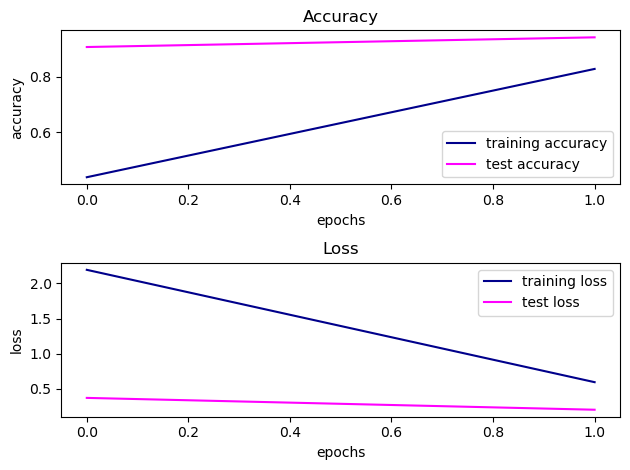

In [20]:
from perf import perf 

perf(anc)

In [21]:
from perf import ratio_kaggle

ratio_kaggle(y_test_tc, X_test, model)

True codes :  [47 30 22 ... 32 17 31]
Number of true codes :  1774
56/56 [==============================] - 3s 58ms/step
Predictions :  [47 30 22 ... 32 17 31]
Number of predictions :  1774
Number of right :  1672
Number of elements :  1774
Ratio :  0.9425028184892897


In [22]:
from perf import network

from warnings import filterwarnings

filterwarnings('ignore')

network(model, y_test_tc, X_test, label_names, nbr_class)

[INFO] evaluating network...
56/56 [==============================] - 4s 70ms/step
                                 precision    recall  f1-score   support

               "uneven_surface"       1.00      1.00      1.00         2
                         "bump"       1.00      1.00      1.00        35
                     "slippery"       1.00      0.75      0.86         8
                   "left_curve"       1.00      1.00      1.00         4
                  "right_curve"       1.00      1.00      1.00         2
                  "left_curves"       1.00      1.00      1.00         2
                 "right_curves"       0.00      0.00      0.00         3
                     "children"       0.97      0.99      0.98        68
                      "cyclist"       1.00      0.90      0.95        10
                      "animals"       1.00      1.00      1.00         5
                    "roadworks"       0.87      0.93      0.90        14
              "traffic_signals"       1.

<font size=6  color= 'white' > <b> Phase 6 : Visualisation of the first kaggle challenge </b> <br>

The aim of this part is to visualise the dataset of the first challenge 

In [23]:
from Visu import to_jpeg
from os import makedirs 
from os.path import exists 

folder_dir = "challenge_1/eval_kaggle1"
dest = "challenge_1/visu"
if not exists(dest) : 
    makedirs(dest)

to_jpeg(folder_dir, dest)

<font size=6  color= 'white' > <b> Phase 7 : Generating csv for kaggle </b> <br>

The aim of this part is to predict on the kaggle dataset and generate a csv 

In [24]:
from CSV import store_2

images, names = store_2('challenge_1/eval_kaggle1', resol)

Number of images and their resolution in the kaggle dataset :  (202, 50, 50, 3)


In [25]:
from csv import DictReader

# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

7/7 [==============================] - 0s 43ms/step


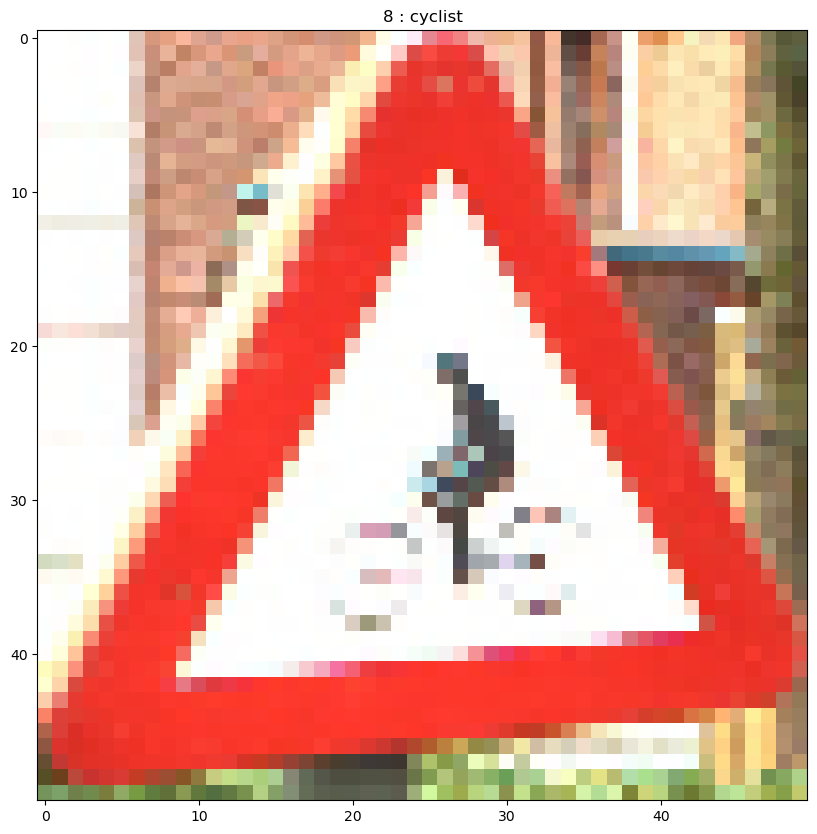

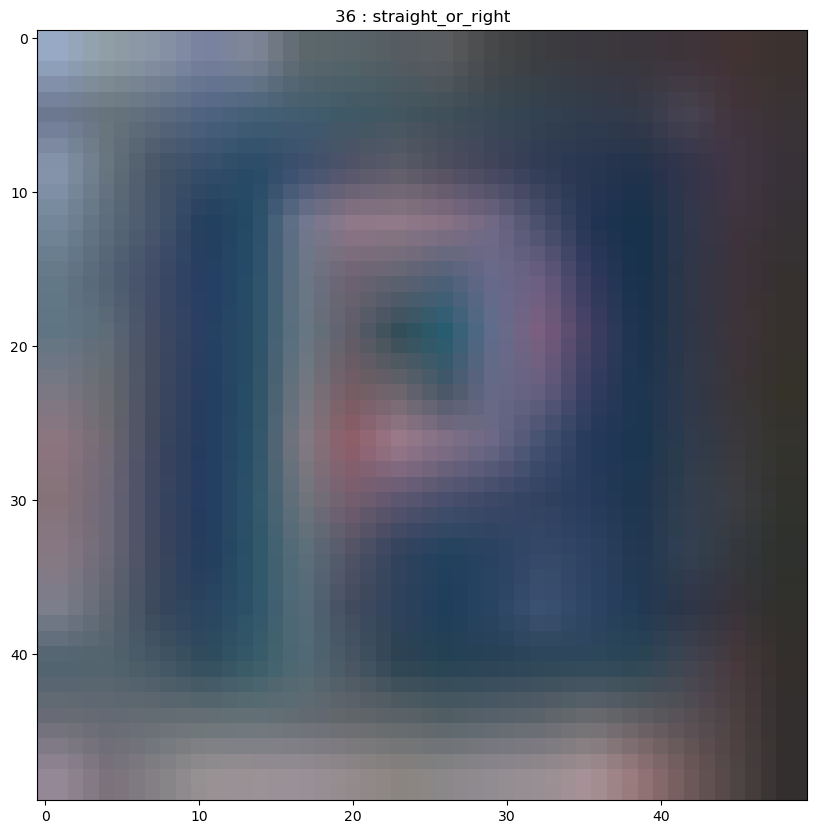

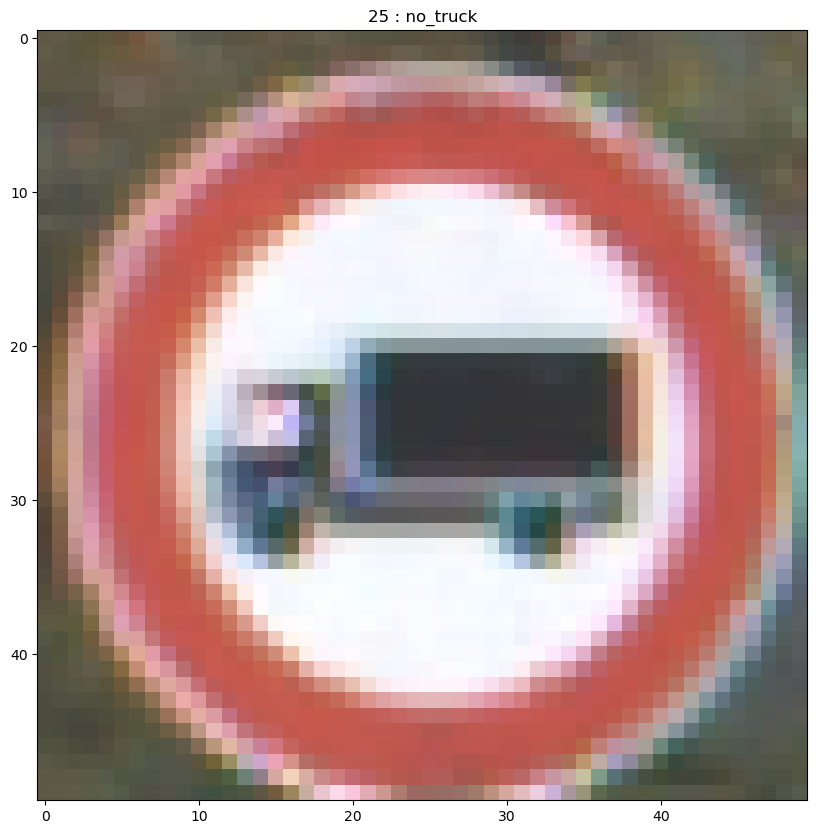

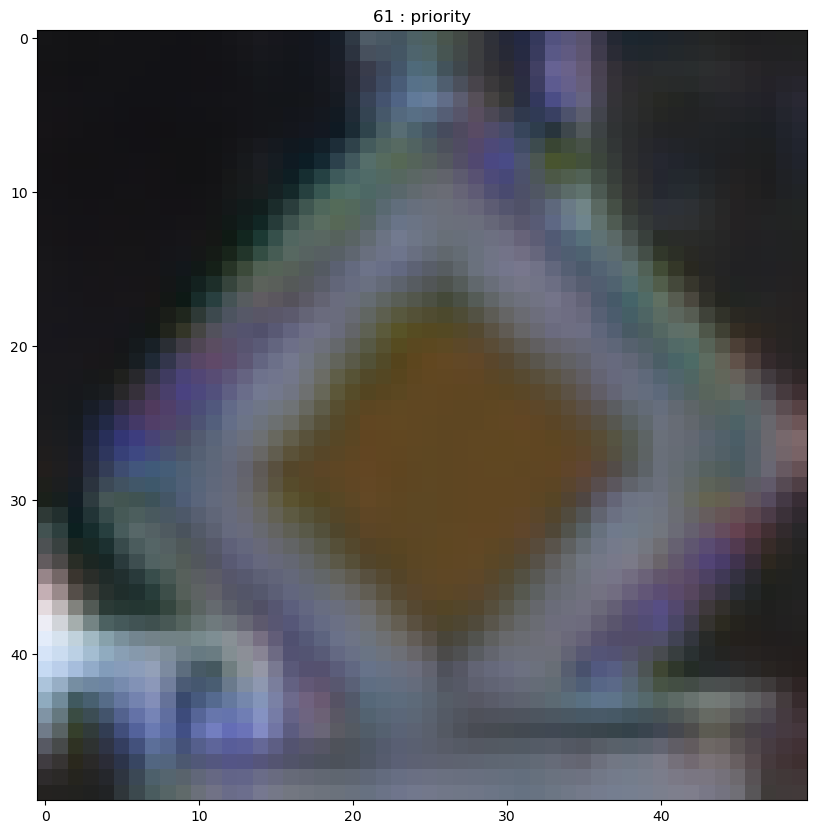

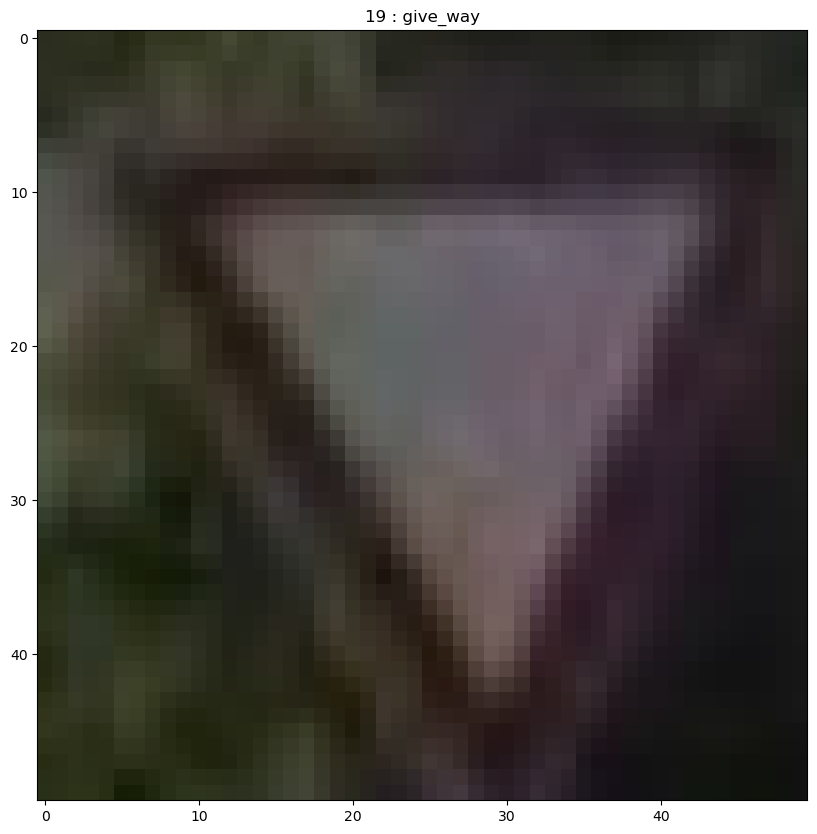

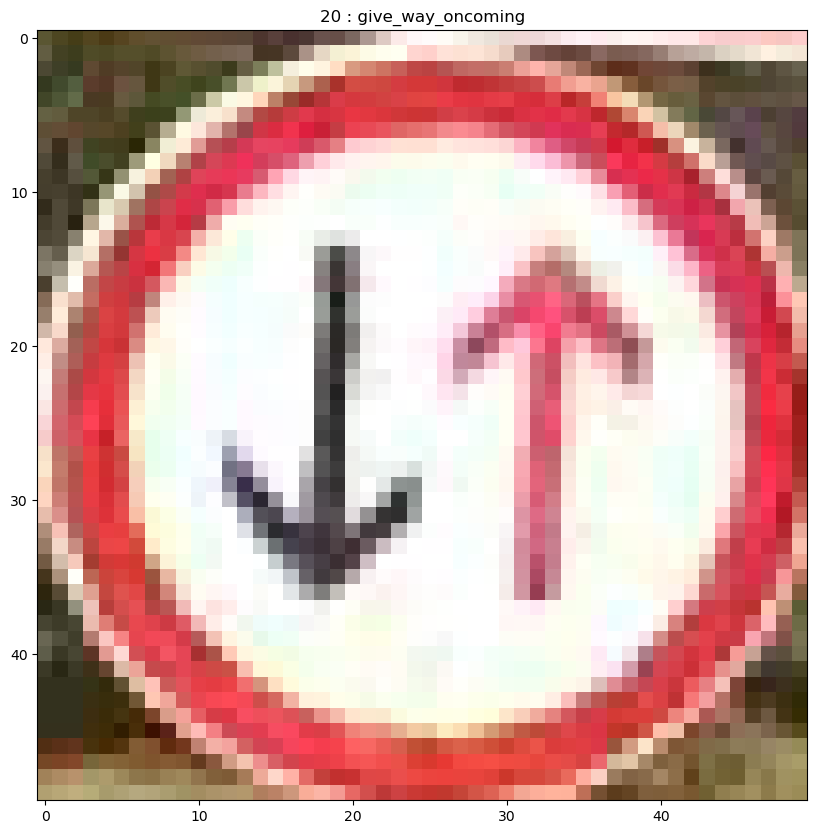

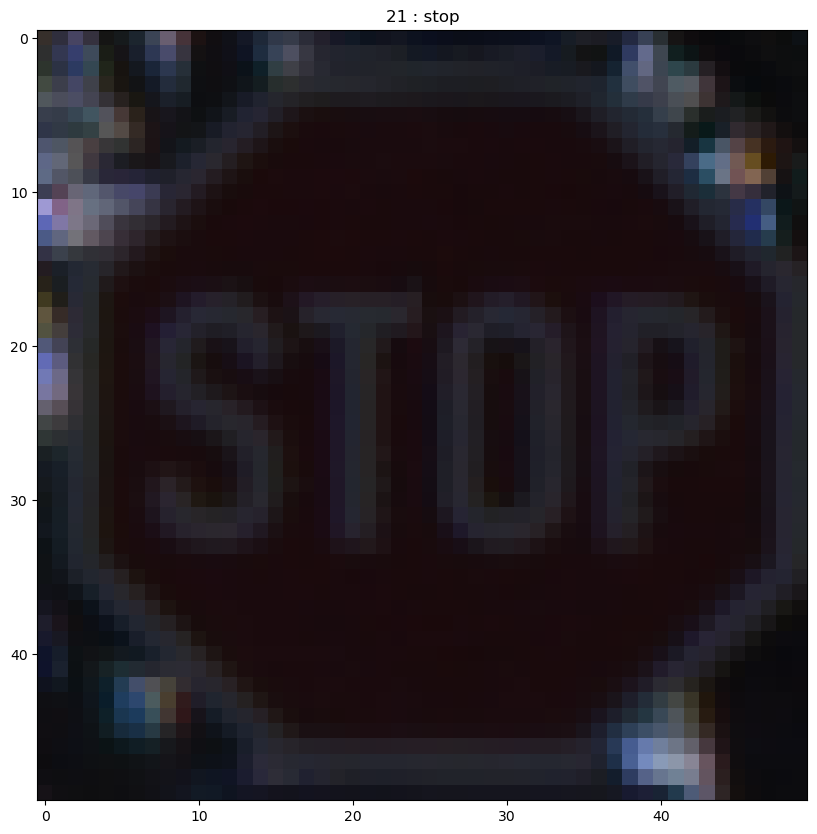

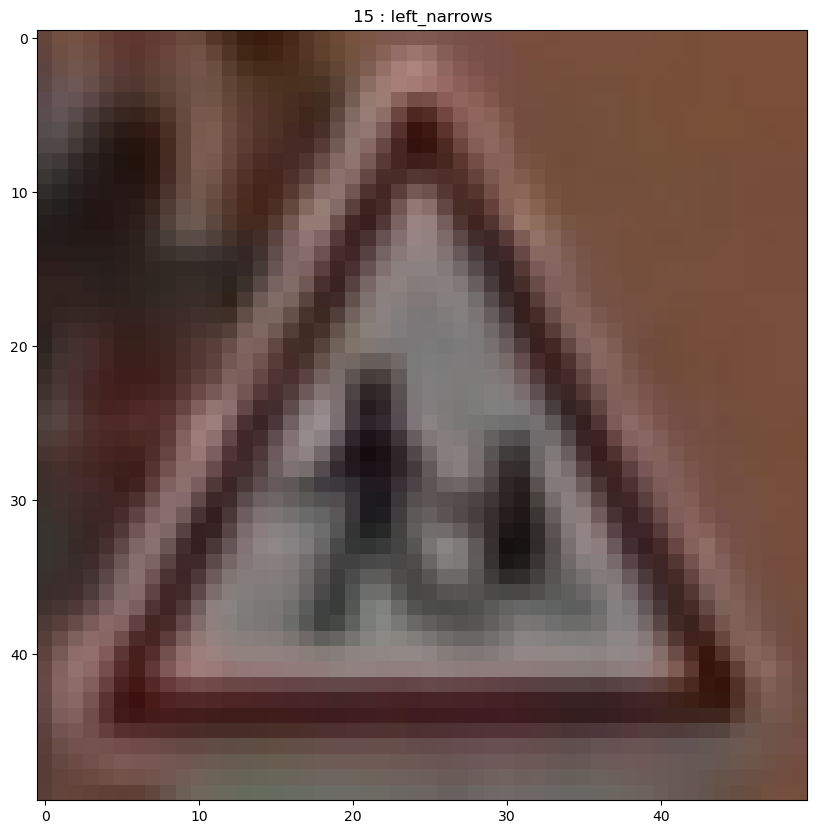

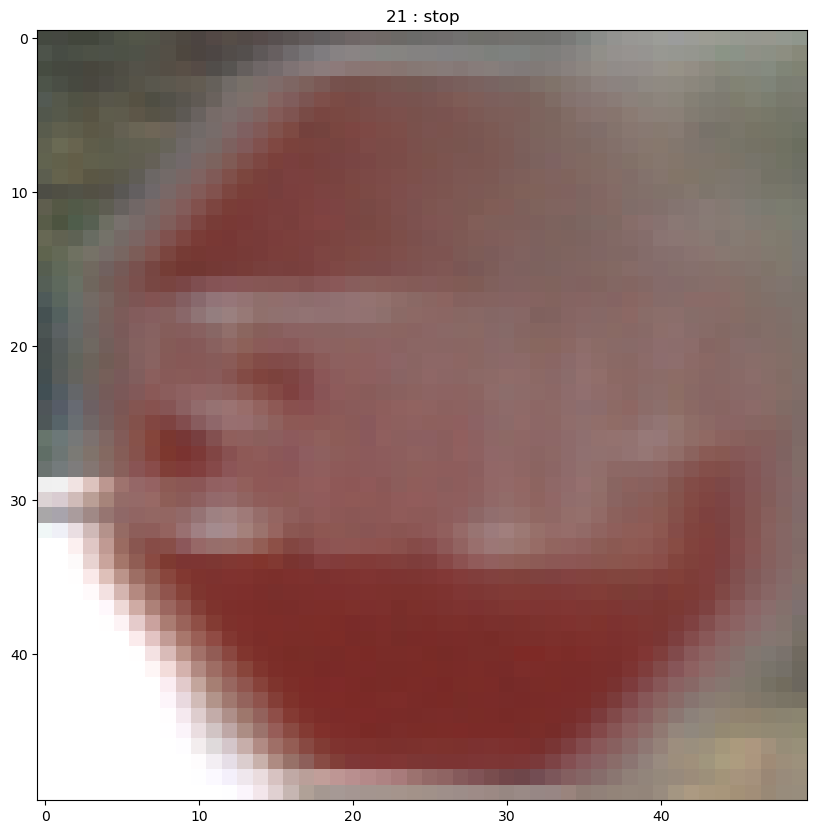

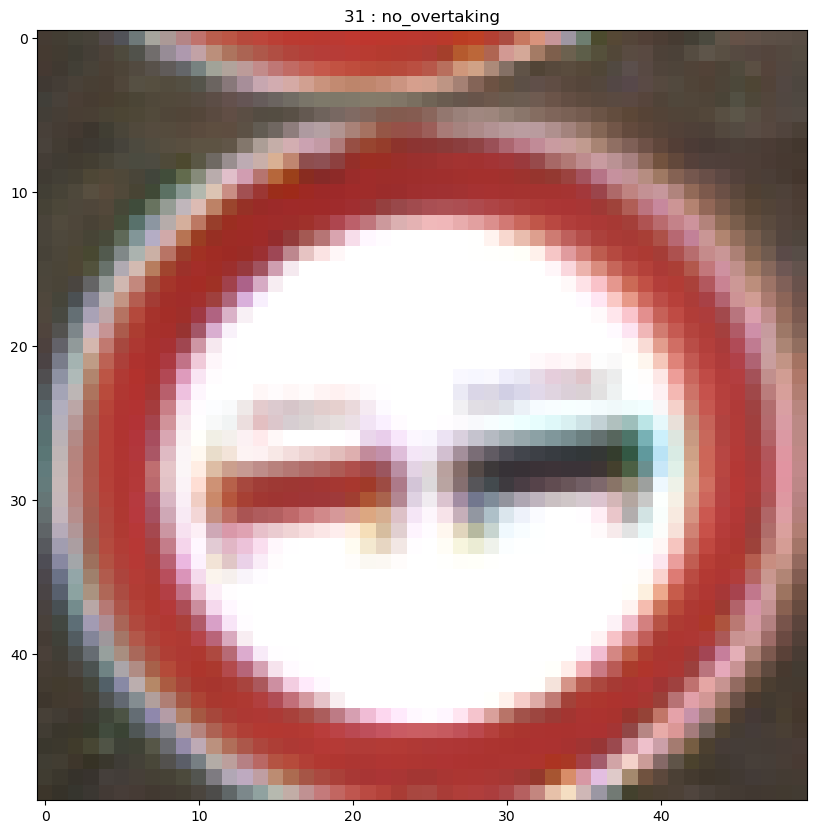

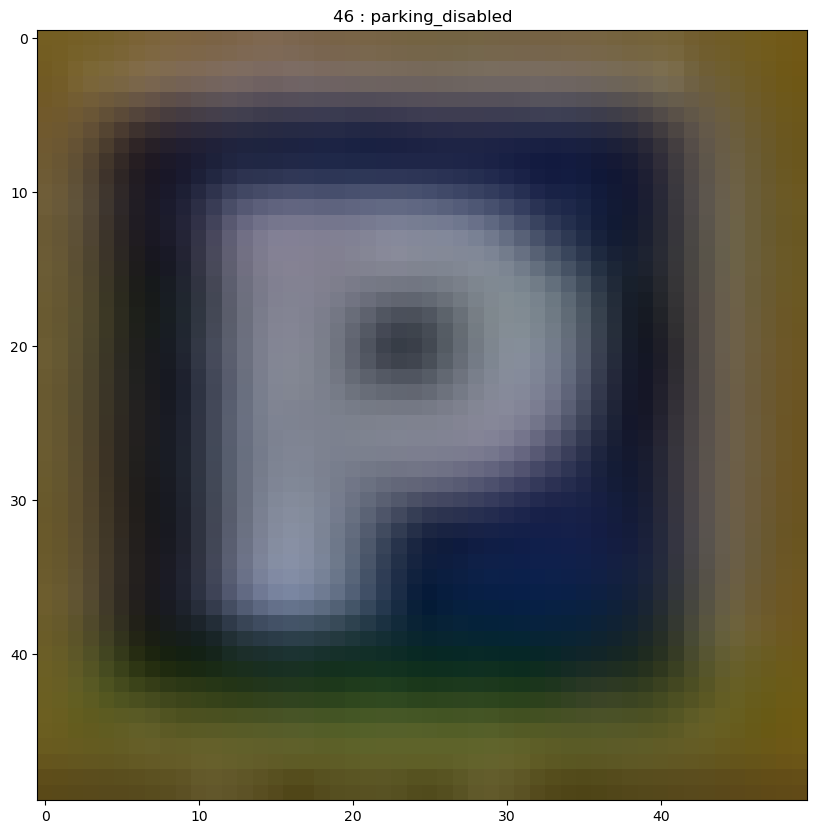

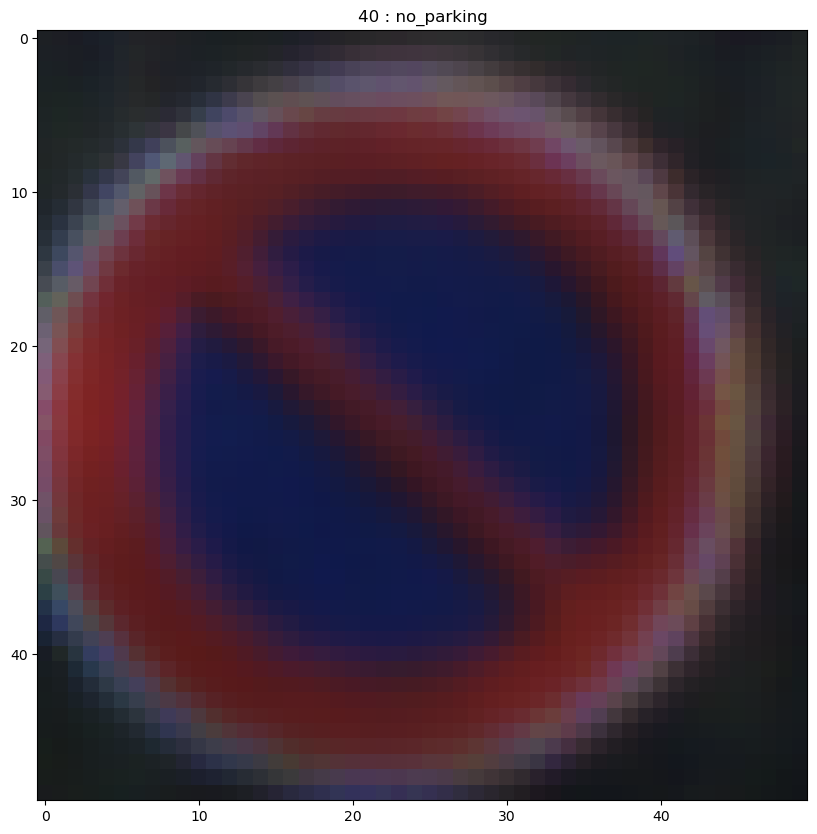

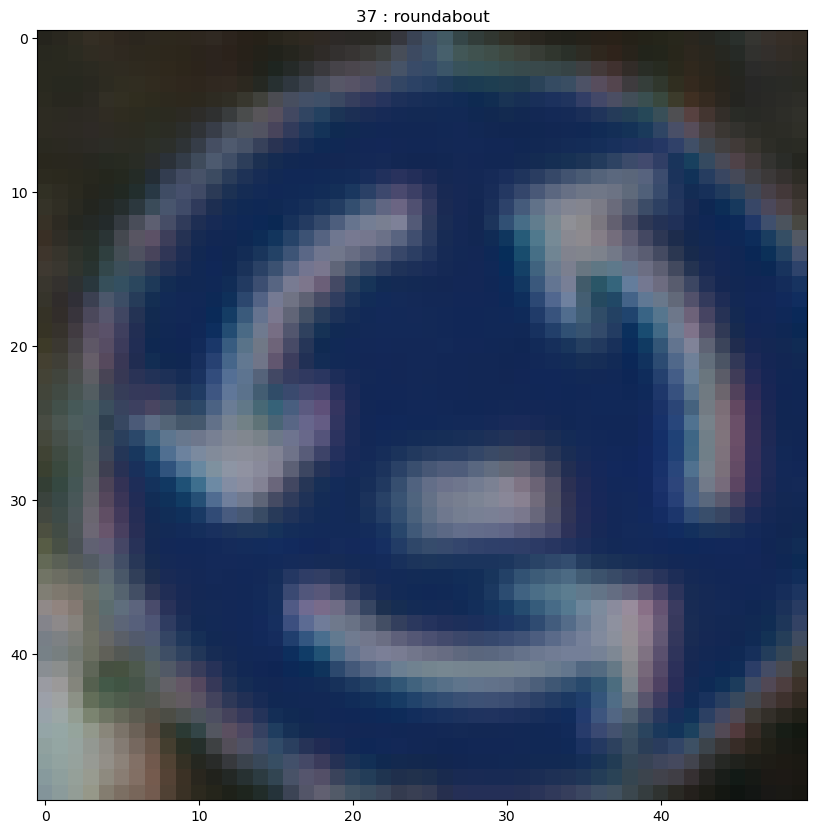

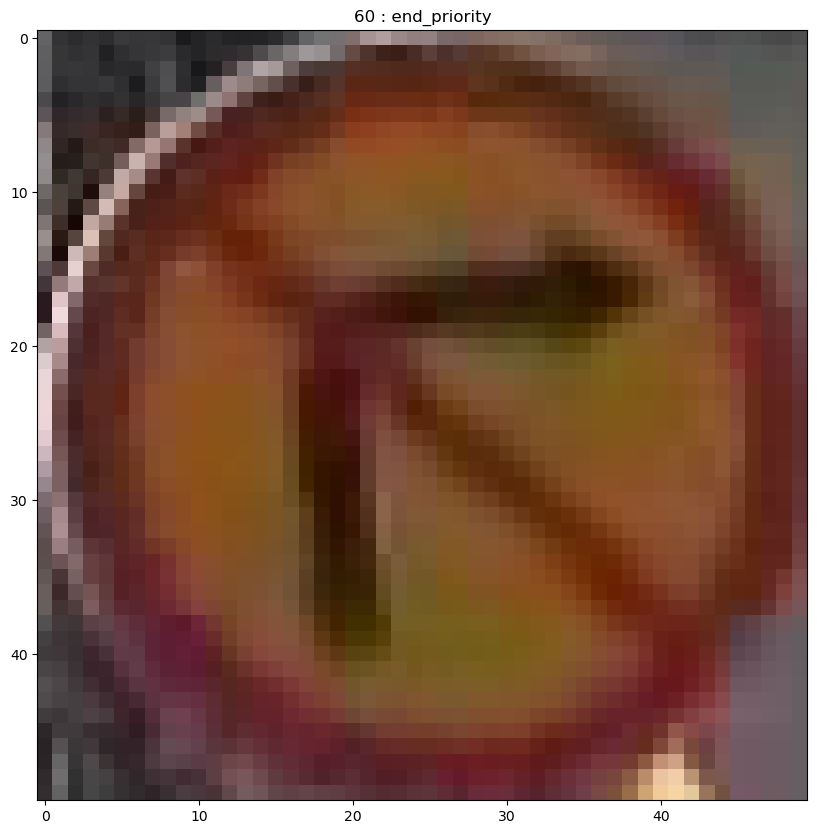

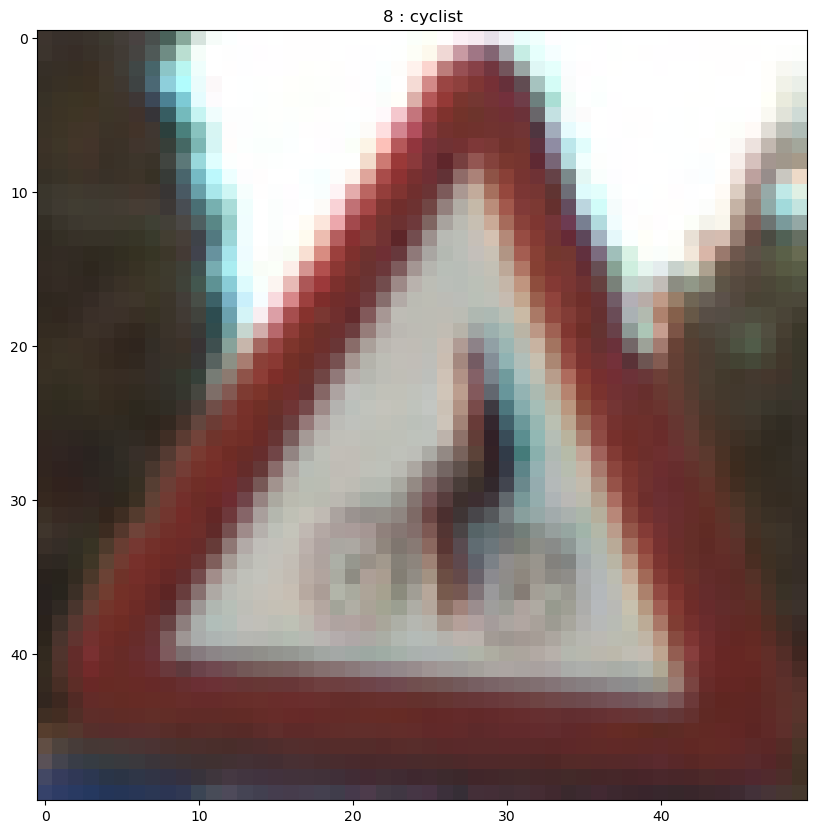

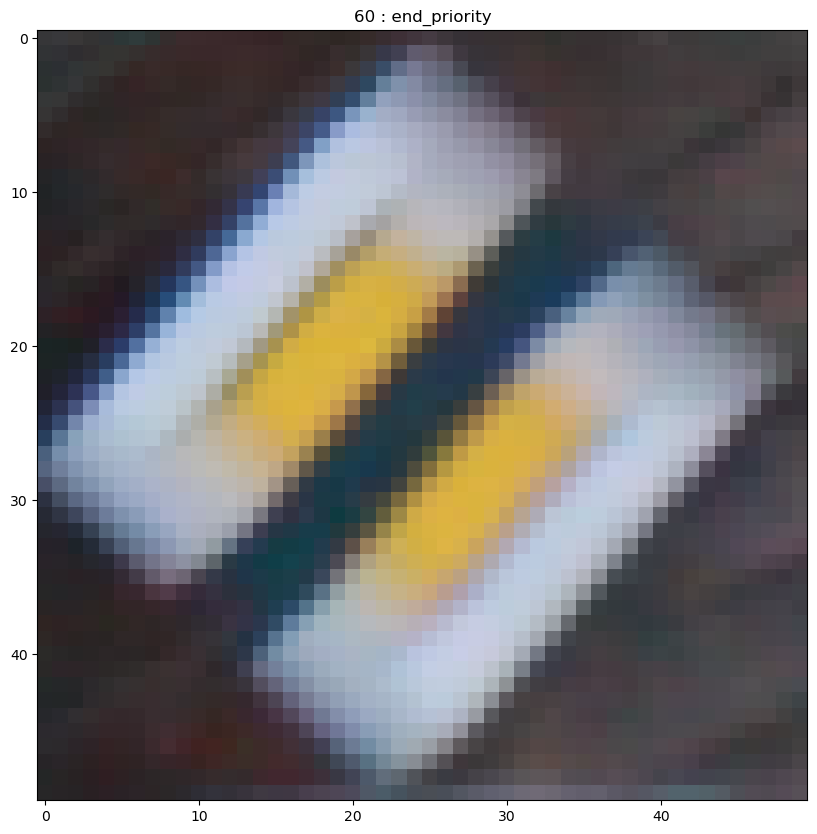

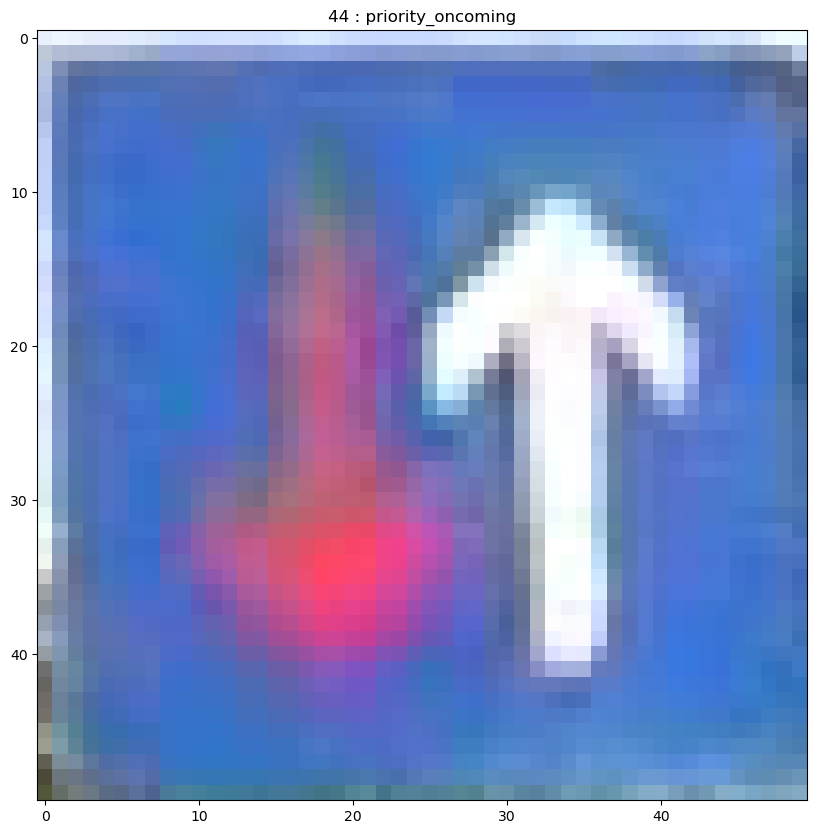

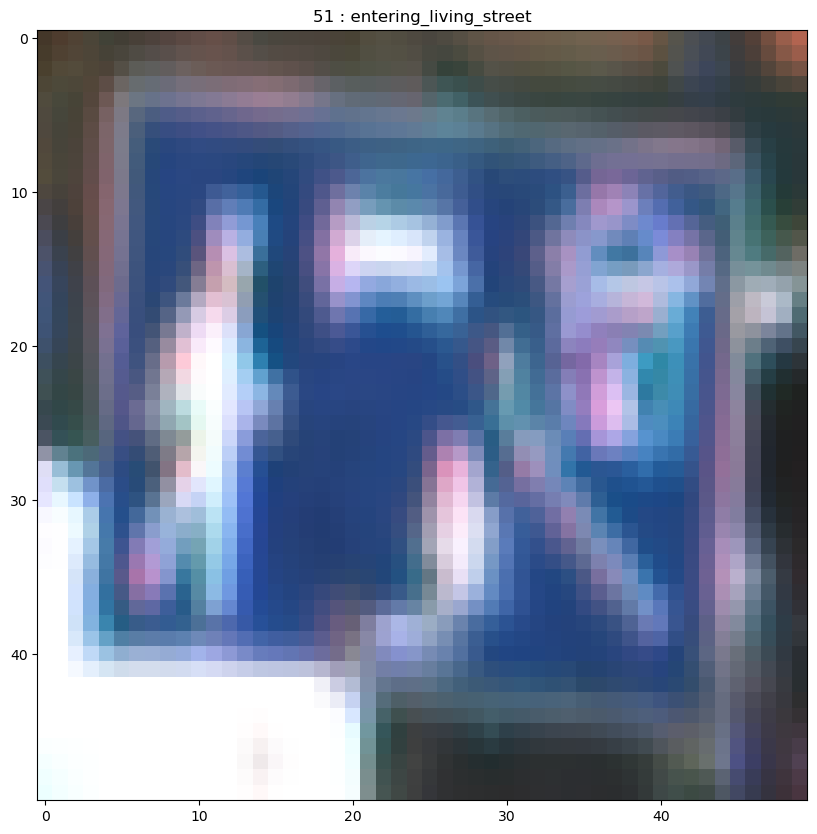

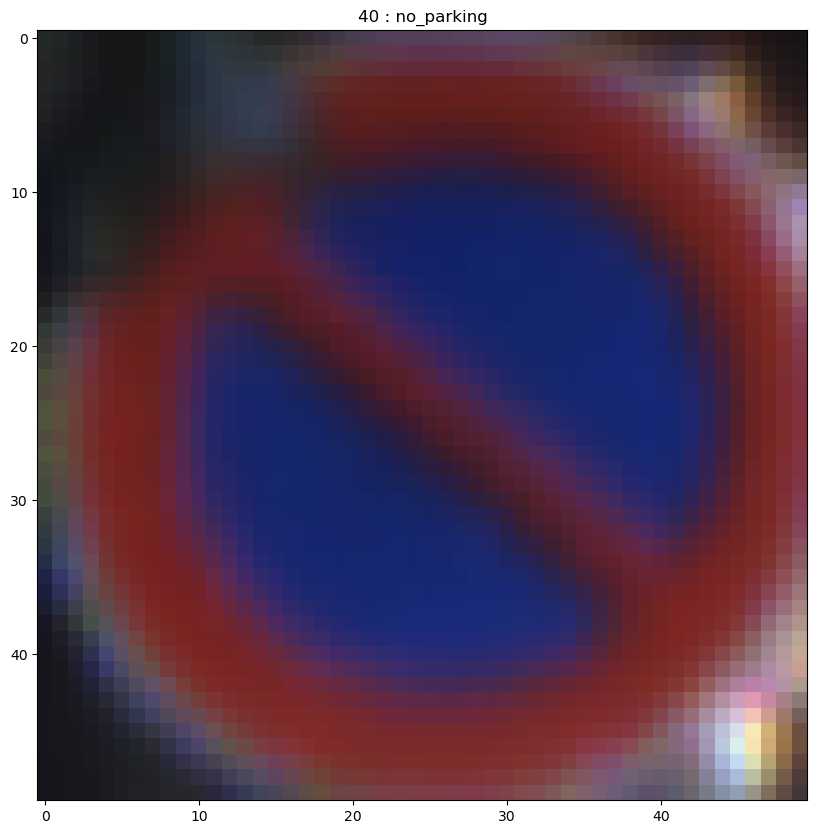

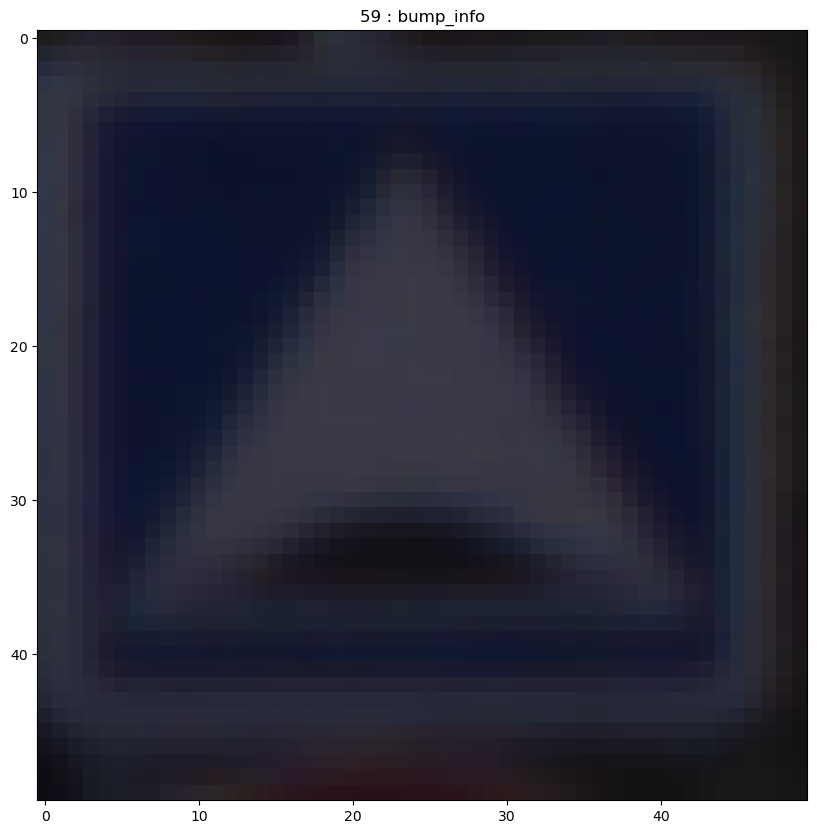

In [26]:
from matplotlib.pyplot import figure, title, imshow 
from numpy import uint8

# Here's a little test to visualise some results 
# We then print the image with num and the sign predicted as a title 

predictions = model.predict(images).argmax(axis=1) 

visu_pred = zeros(images.shape)

for i in range (images.shape[0]):
    for j in range (images.shape[3]) : 
        for k in range (images.shape[1]):
            for l in range (images.shape[2]): 
                visu_pred[i,k,l,j] = images[i,k,l,j] / 255

for i in range(20): 
    figure(figsize = (10,10))
    imshow(visu_pred[i])
    sign = data[str(predictions[i])]
    title(str(predictions[i]) + " : " + str(sign))



In [27]:
# We generate the csv file for kaggle 

from CSV import write 

write(names, predictions, 'kaggle_1')

<font size=6  color= 'white' > <b> Part 2 : Cropping </b> <br>

<font size=6  color= 'white' > <b> Phase 1 : Detecting forms </b> <br>

The aim of this part is to detect forms and contours in the image

In [28]:
from cv2 import imread, bitwise_and, isContourConvex, boundingRect, minEnclosingCircle, contourArea, imwrite, rectangle, drawContours, waitKey, cvtColor, COLOR_BGR2RGB
from os.path import basename, realpath
from numpy import pi 

from contours import edges, cont, HSV, parameters

def process_shape(raw_image, dest, f) : 

    process_image = raw_image.copy() #copy the image

#----------------------------------------------------------------------------------------------------------

    edge_detected_image = edges(process_image)

    contours = cont(edge_detected_image)

#----------------------------------------------------------------------------------------------------------

    process_image = raw_image.copy()

    mask = HSV(process_image)

    # Apply mask to image to remove grayscale regions
    masked_image = bitwise_and(process_image, process_image, mask=mask)

#----------------------------------------------------------------------------------------------------------

    edge_detected_image = edges(masked_image)

    contours = cont(edge_detected_image)

#----------------------------------------------------------------------------------------------------------

    shapes = [] 
    for contour in contours:

        length, approx, area, perimeter, circularity = parameters(contour)

        #----------------------------------------------------------------------------------------------------------
        # A lot of conditions to classify forms 
        
        if circularity < 0.8:
            continue

        if not isContourConvex(approx):
            continue

        if len(approx) == 3: # We're looking for triangles 
            shapes.append(contour)

        elif len(approx) == 4: # We're looking for squares and losanges 
            (x, y, w, h) = boundingRect(approx)
            ar = w / float(h)
            if (ar >= 0.8 and ar <= 1.2):
                shapes.append(contour)
            else:
                continue

        elif len(approx) == 8: # We're looking for octogones
            shapes.append(contour)

        elif len(approx) > 8: # check if contour has a circular shape
            (x, y), radius = minEnclosingCircle(contour)
            area = contourArea(contour)
            if radius > 0 and area / (pi * radius**2) >= 0.8:
                shapes.append(contour)

        else:
            continue

    #----------------------------------------------------------------------------------------------------------
    # Find contours with largest areas for each shape

    try:
        best_contour = max(shapes, key=lambda x: contourArea(x))
    except ValueError:
        best_contour = None

    if best_contour is None:
        print(' No shape found')
        #bounding box is the whole image
        imwrite(dest + "/" + basename(realpath(f)).replace('.ppm', '.jpeg'), raw_image)
        
        return False
    
    #----------------------------------------------------------------------------------------------------------
    # If it worked, crop the image with a rectangle around the detected shape 
    
    (x,y,w,h) = boundingRect(best_contour)
    rectangle(raw_image, (x,y), (x+w,y+h), (0,255,0), 2)
    drawContours(raw_image, [best_contour],  -1, (255,0,0), 2)
    waitKey()

    raw_image = raw_image[y:y + h, x:x + w]
    img = imread(f)
    img = cvtColor(img,COLOR_BGR2RGB)   

    imwrite(dest + "/"+ basename(realpath(f)).replace('.ppm', '.jpeg'), raw_image)

    return True

In [29]:
from cv2 import imread, GaussianBlur, imshow, waitKey, medianBlur, drawContours, COLOR_BGR2HSV, inRange, bitwise_or, findContours, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE, arcLength, contourArea, convexHull
from numpy import array, pi 
from os.path import basename, realpath

from retrieving_data import accessing_2

def process(path, dest):

    #----------------------------------------------------------------------------------------------------------

    names = accessing_2(path)

    #----------------------------------------------------------------------------------------------------------

    for f in names : 

        raw_image = imread(f) #load the image
        process_image = raw_image.copy() #copy the image
        if(process_shape(raw_image, dest, f)):
            continue

        # On floute avec du gaussian puis du median blur
        blur = GaussianBlur(process_image, (9, 9), 0)
        blur = medianBlur(blur, 9)

        # On transforme l'image en image HSV
        img_hsv = cvtColor(blur, COLOR_BGR2HSV)
        img_hsv[...,1] = img_hsv[...,1]*1.4


        # Définit la range du rouge en HSV
        lower_red = array([0, 50, 50])
        upper_red = array([10, 255, 255])

        # Crée un masque pour la couleur rouge en utilisant la range définie
        mask1 = inRange(img_hsv, lower_red, upper_red)
        # Masque rouge valeurs hautes
        lower_red = array([170, 70, 50])
        upper_red = array([180, 255, 255])
        mask_red = inRange(img_hsv.copy(), lower_red, upper_red)

        mask_red = bitwise_or(mask1, mask_red)

#----------------------------------------------------------------------------------------------------------

        # Masque bleu
        lower_blue = array([90, 100, 100])
        upper_blue = array([121, 255, 255])
        mask_blue = inRange(img_hsv.copy(), lower_blue, upper_blue)

        #Total mask
        mask_red_blue = bitwise_or(mask_red, mask_blue)

        #show image with mask
        # imshow('mask', mask_red_blue)
        # waitKey()

#----------------------------------------------------------------------------------------------------------

        # Trouve les contours dans l'image filtrée
        contours, _ = findContours(mask_red_blue, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)

        #draw image with contours
        drawContours(process_image, contours, -1, (0, 255, 0), 3)
        # imshow('contour', process_image)
        # waitKey()

        # Initialise une liste vide pour stocker les contours valides
        list_contour = []
        best_contour = None

        # Parcourt tous les contours trouvés
        for cnt in contours:

            # Calcule le rectangle englobant le contour
            x, y, w, h = boundingRect(cnt)
            #imposer que le bounding box soit plus grand que 5% de l'image 
            
            if (w*h) < (0.0005*raw_image.shape[0]*raw_image.shape[1]):
                print("condition 1")
                continue

            #imposer que le bounding box soit pas un rectangle très plat 
            if (w/h) < 0.7 or (w/h) > 1.3:
                print("condition 2")
                continue

            #if it is a circle very likely to be a round road sign
            area = contourArea(cnt)
            perimeter = arcLength(cnt, True)
            circularity = 4 * pi * area / perimeter ** 2
            if circularity > 0.8:
                best_contour = cnt
                list_contour.append(cnt)
                break
            
            #convexité ? 
            hull = convexHull(cnt)
            hull_area = contourArea(hull)
            solidity = float(area)/hull_area
            if solidity < 0.7:
                print("condition 3")
                continue
            
            list_contour.append(cnt)

        print(len(list_contour))

        after_contour = raw_image.copy()
        drawContours(after_contour, list_contour, -1, (0, 255, 0), 3)
        # imshow('after contour', after_contour)
        # waitKey()

        #----------------------------------------------------------------------------------------------------------

        if(len(list_contour) == 0):
            print("No contour found")
            continue
            
        if(best_contour is None):
            #get max of list_contour
            best_contour = max(list_contour, key=lambda x: contourArea(x))

        #----------------------------------------------------------------------------------------------------------

        (x,y,w,h) = boundingRect(best_contour)
        rectangle(raw_image, (x,y), (x+w,y+h), (0,255,0), 2)
        drawContours(raw_image, [best_contour],  -1, (255,0,0), 2)
        waitKey()
        raw_image = raw_image[y:y + h, x:x + w]
        img = imread(f)
        img = cvtColor(img, COLOR_BGR2RGB)   
        imwrite(dest+"/"+basename(realpath(f)).replace('.ppm', '.jpeg'), raw_image)

    return names

In [30]:
from os.path import exists
from os import system, makedirs

# from Visu import show_images

path = "eval_kaggle2"
dest = "result_croppped_eval_2"

if exists(dest):
    system('rm -r dest')

if not exists(dest):
    makedirs(dest)

if not exists(path):
    makedirs(path)

names = process(path, dest)
#show_images(dest)

number of images in the folder :  0


<font size=6  color= 'white' > <b> Phase 2 : Generating a CSV for kaggle </b> <br>

In [31]:
from CSV import store_2

images, names = store_2('result_croppped_eval_2', resol)

Number of images and their resolution in the kaggle dataset :  (66, 50, 50, 3)


In [32]:
from csv import DictReader

# We will store the data in dict.csv in a dict 

data = {}

with open('dict.csv', 'r') as f:
    d_reader = DictReader(f, fieldnames=["num", "sign"])

    #get fieldnames from DictReader object and store in list
    for row in d_reader:
        data[row['num']] = row['sign']

3/3 [==============================] - 0s 25ms/step


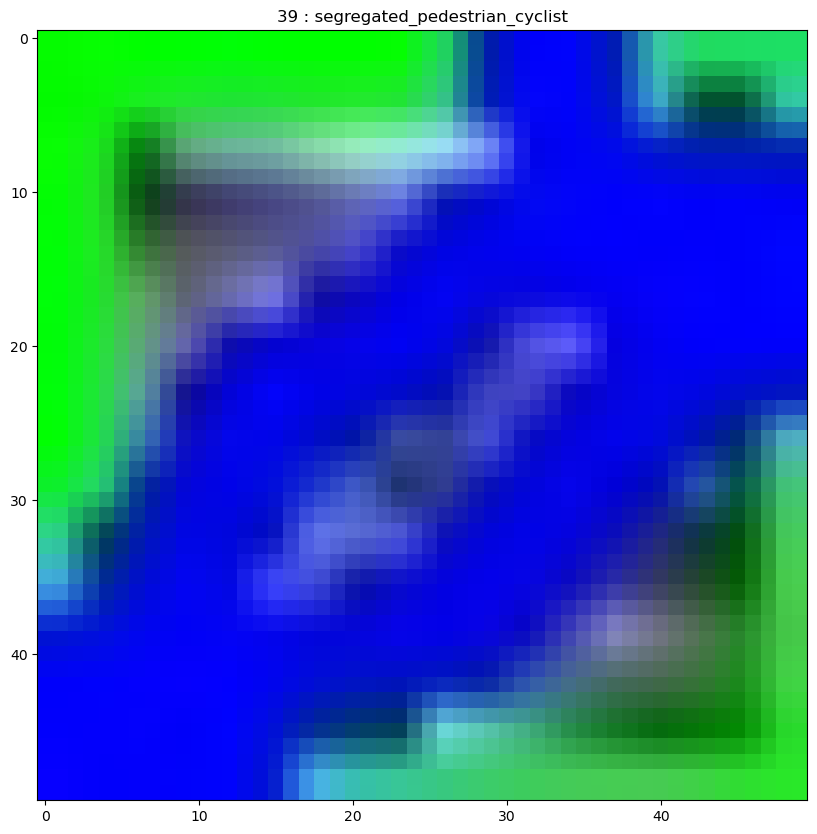

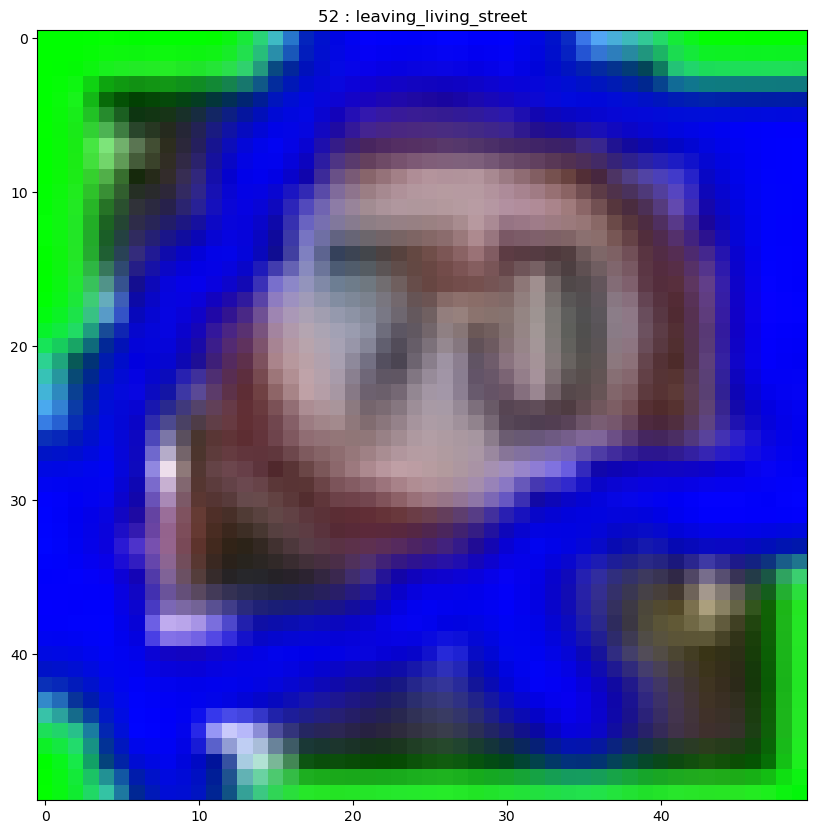

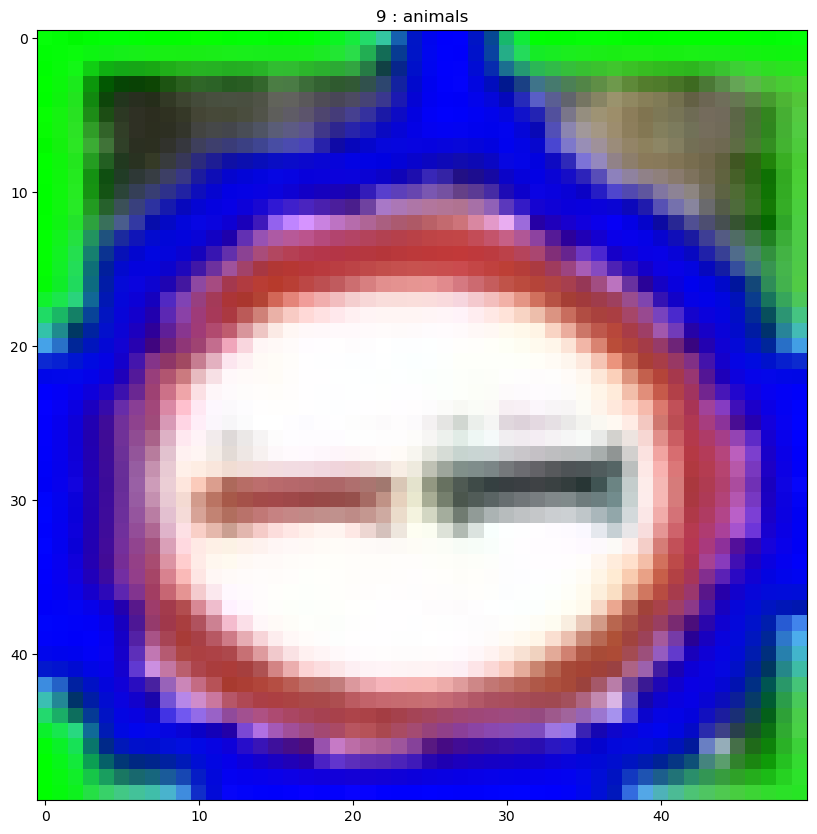

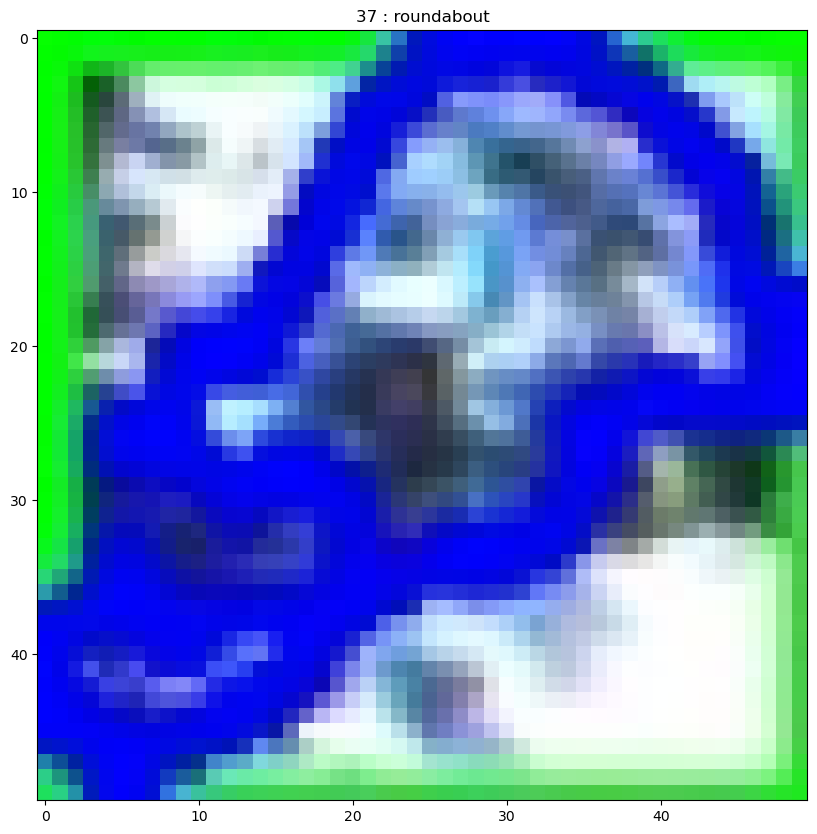

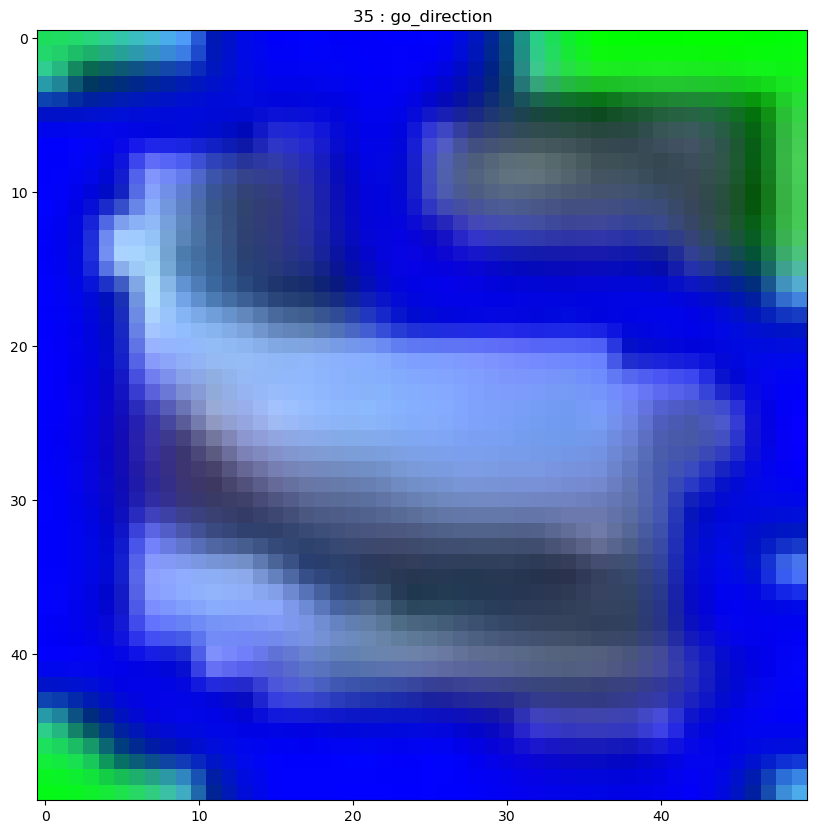

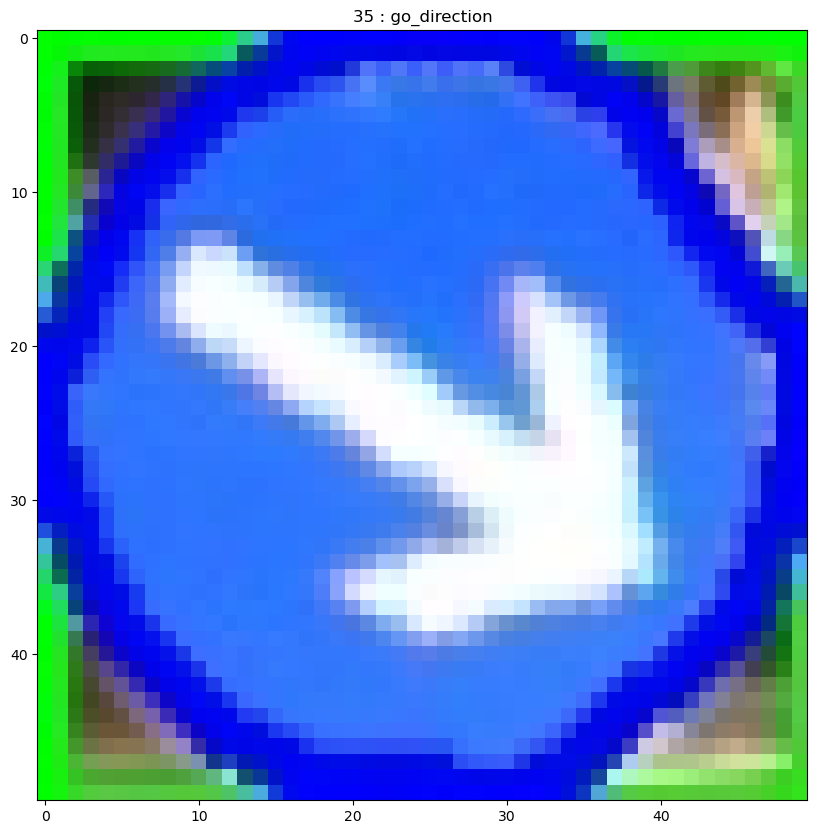

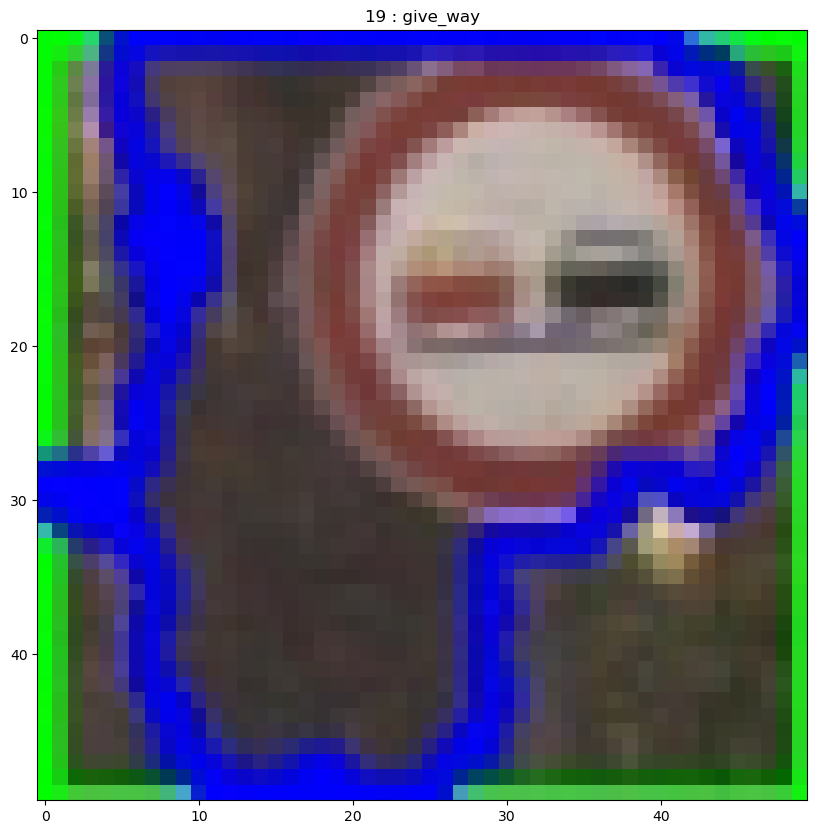

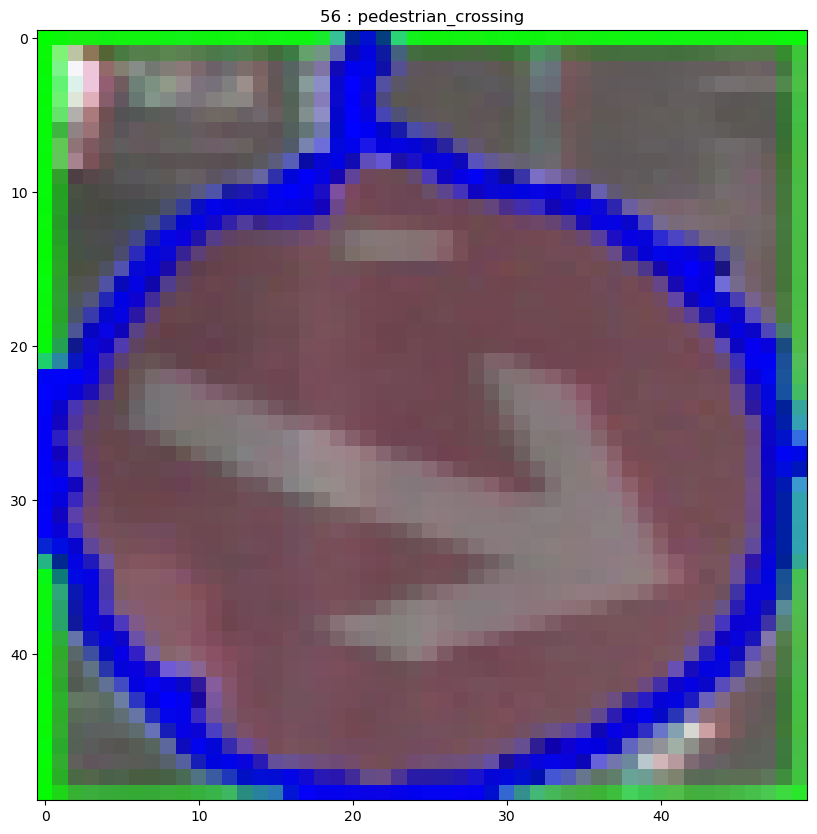

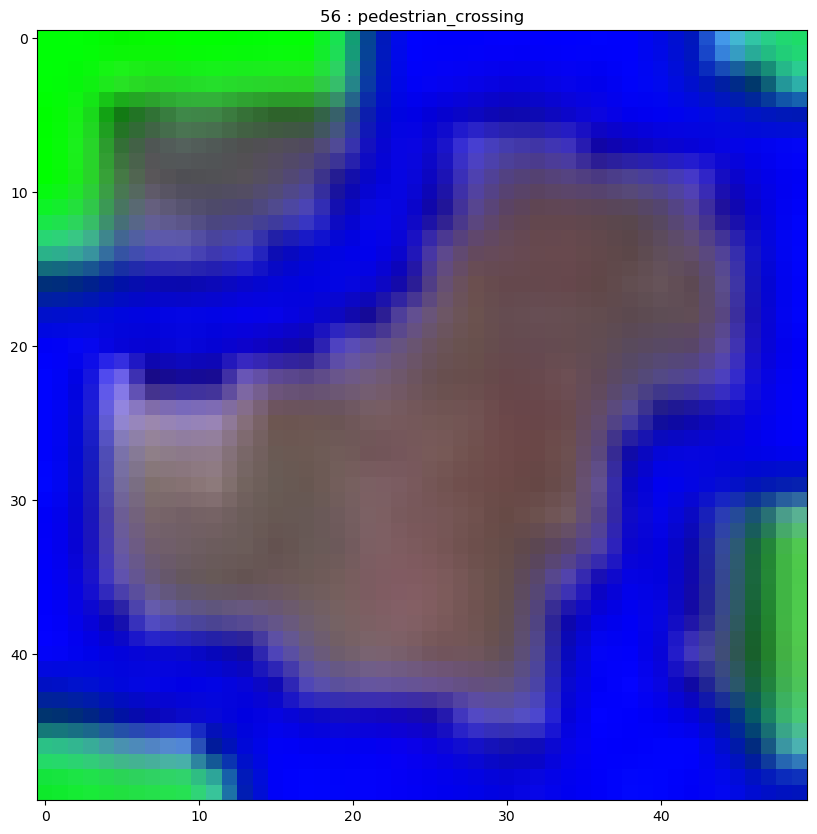

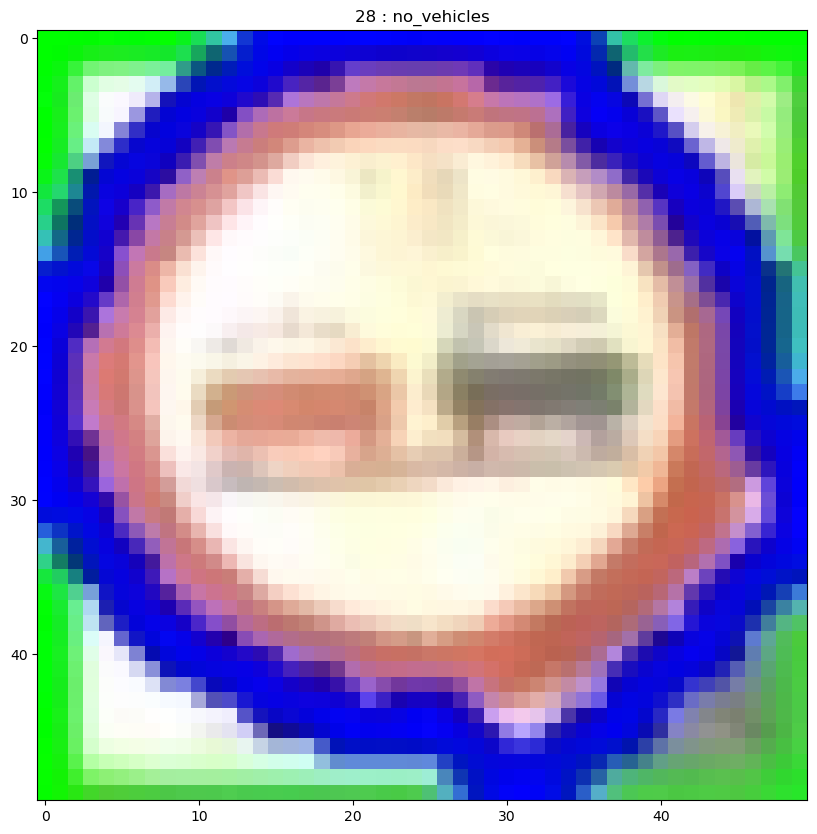

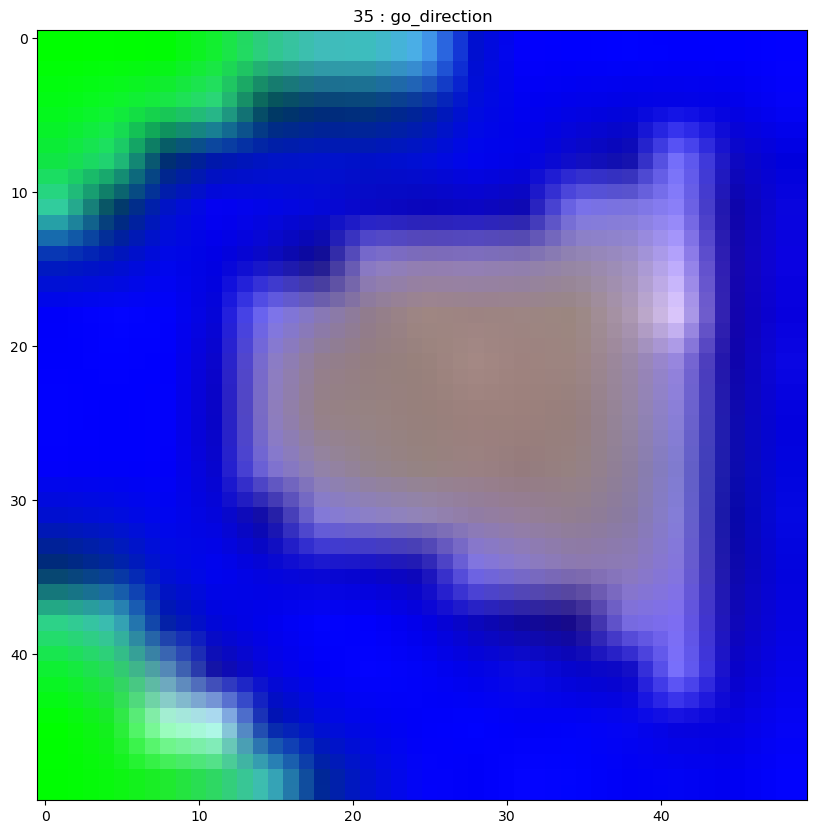

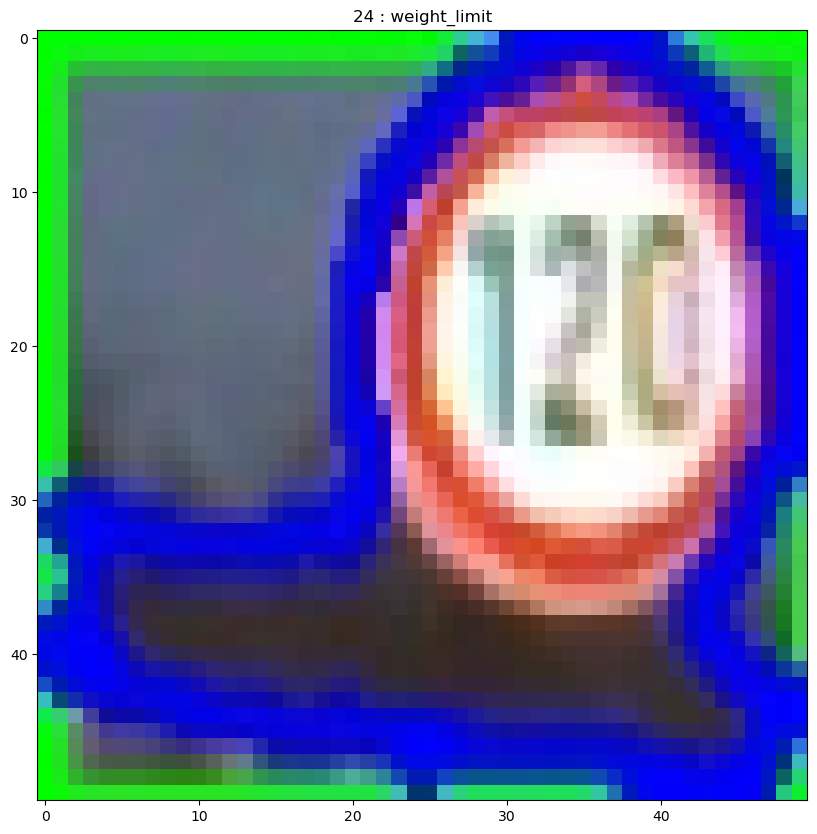

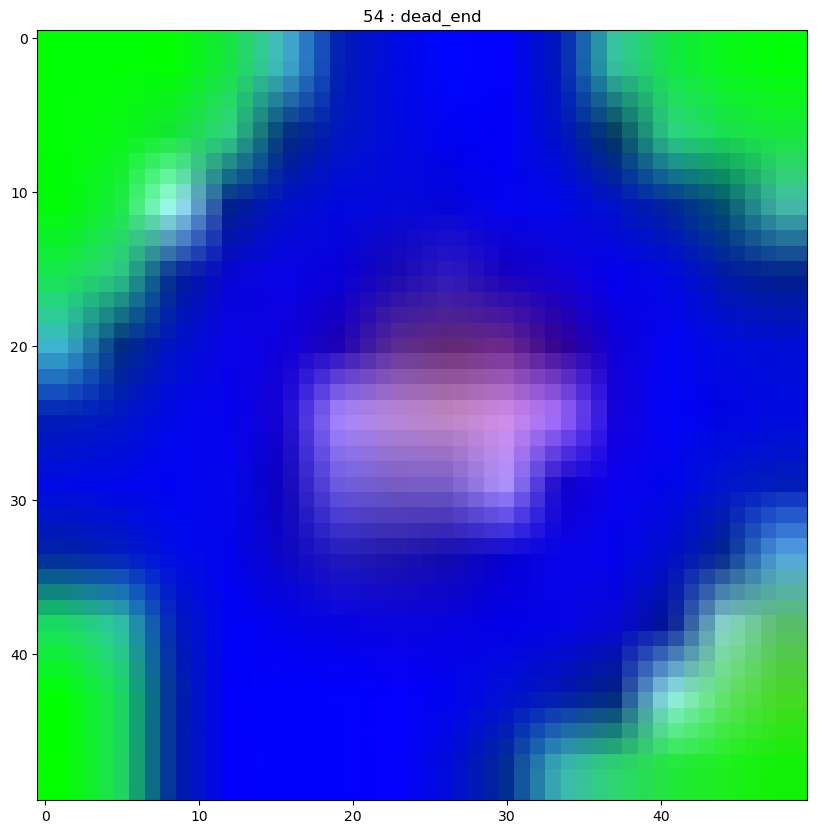

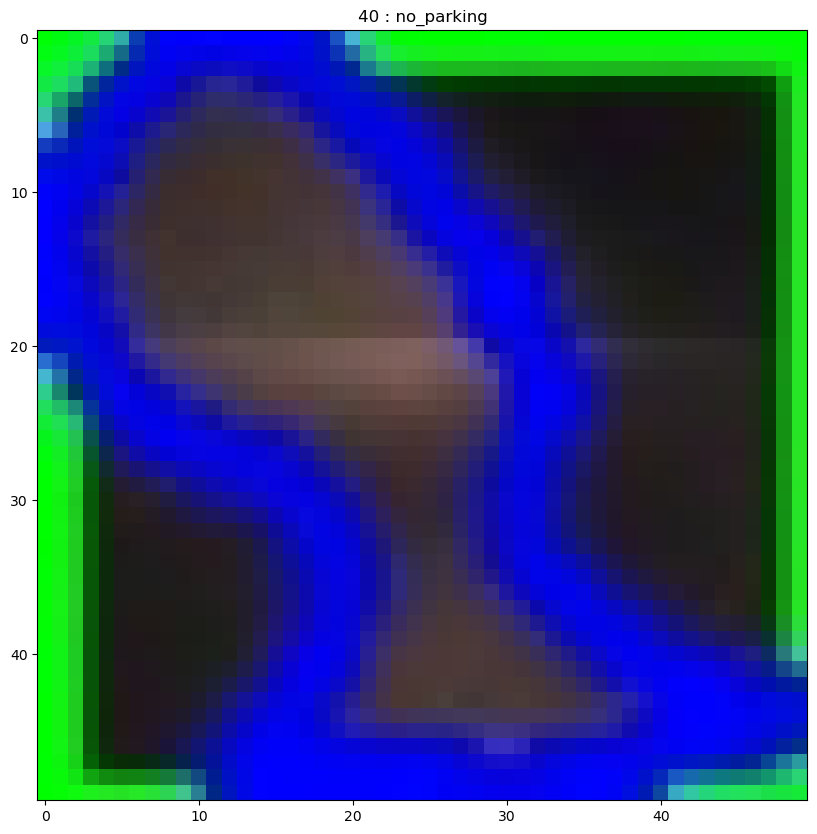

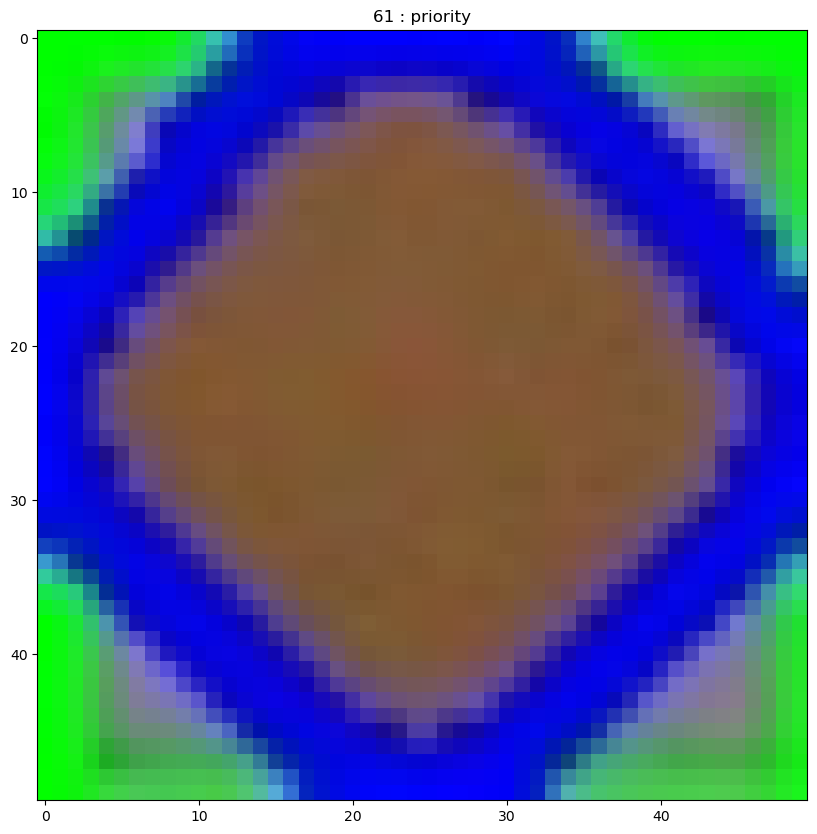

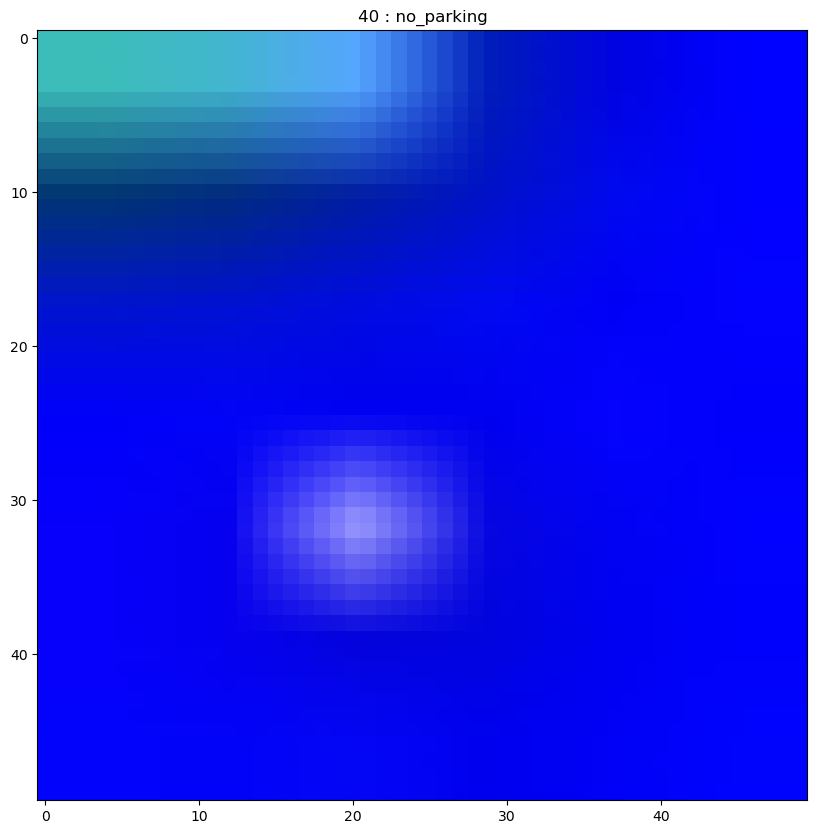

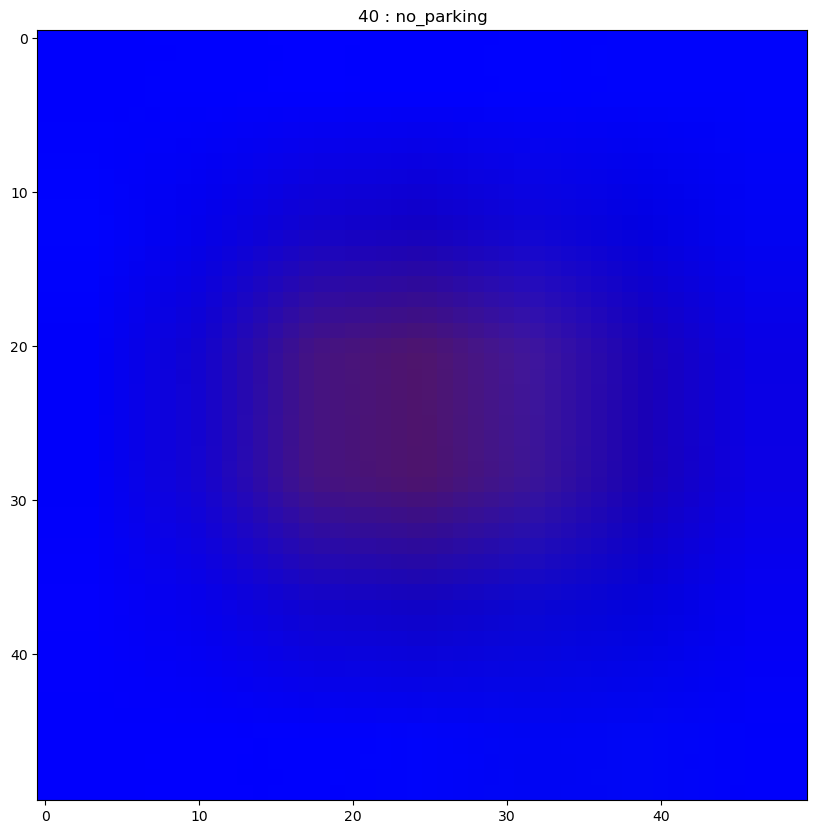

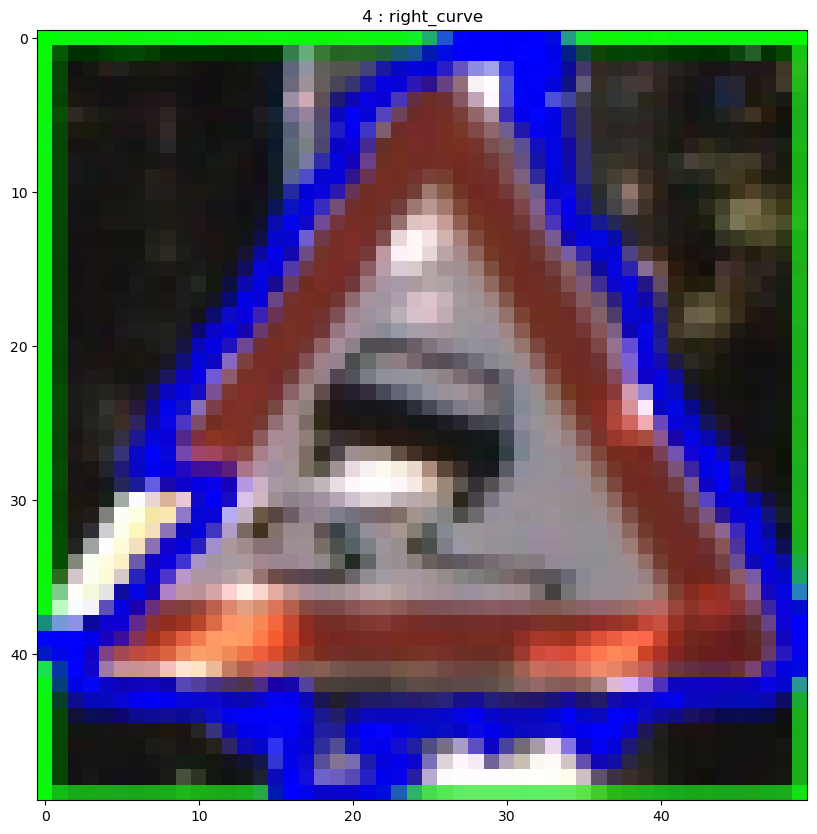

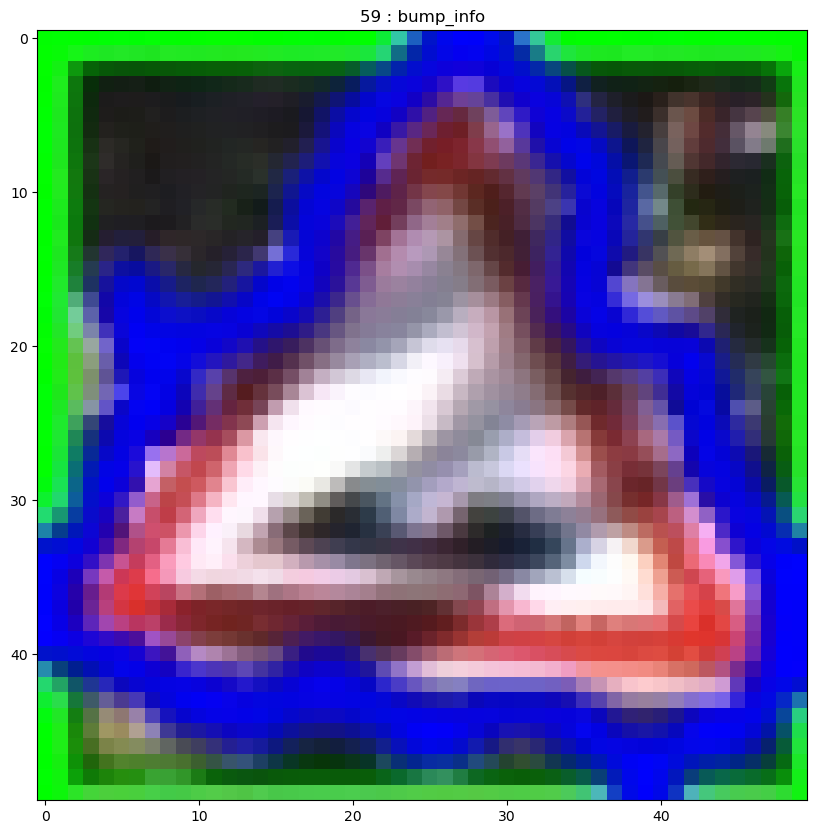

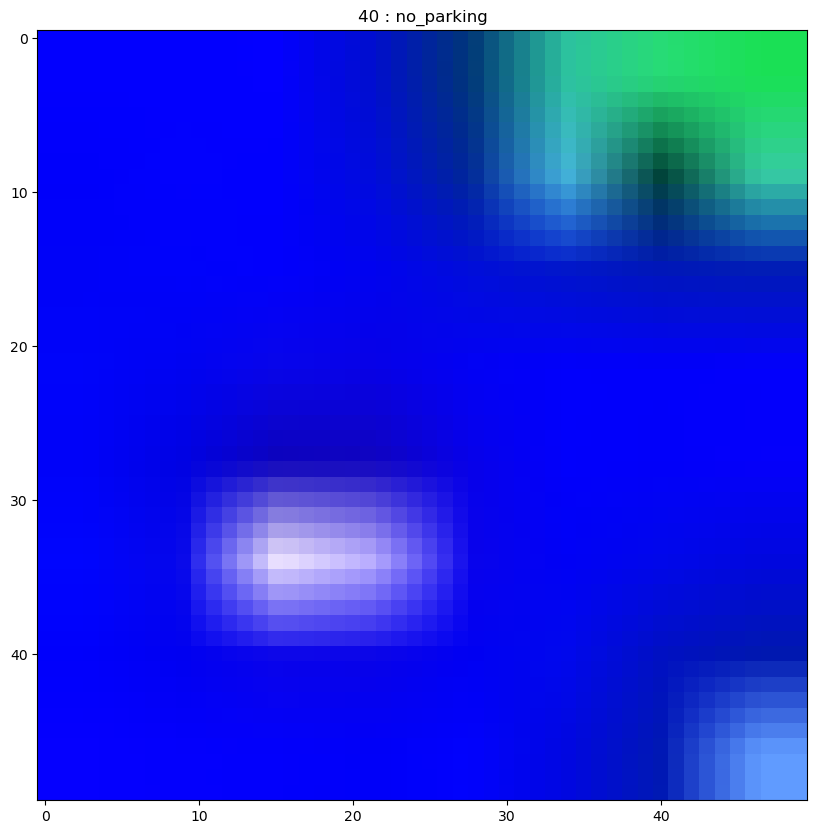

In [33]:
from matplotlib.pyplot import figure, title, imshow 
from numpy import uint8

# Here's a little test to visualise some results 
# We then print the image with num and the sign predicted as a title 

predictions = model.predict(images).argmax(axis=1) 

visu_pred = zeros(images.shape)

for i in range (images.shape[0]):
    for j in range (images.shape[3]) : 
        for k in range (images.shape[1]):
            for l in range (images.shape[2]): 
                visu_pred[i,k,l,j] = images[i,k,l,j] / 255

for i in range(20): 
    figure(figsize = (10,10))
    imshow(visu_pred[i])
    sign = data[str(predictions[i])]
    title(str(predictions[i]) + " : " + str(sign))

In [34]:
# We generate the csv file for kaggle 

from CSV import write 

write(names, predictions, 'kaggle_2')